DSCI-552: Homework #4

Michael Hanono

Student ID: 1426377592

October 2021

In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install -U scikit-learn
!pip install javabridge
!pip install python-weka-wrapper3

In [74]:
import pandas as pd
import numpy as np
from numpy import nan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn import model_selection
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from operator import itemgetter
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import weka as weka
from weka.classifiers import Classifier
import weka.core.jvm as jvm
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
import weka.plot.classifiers as plot_cls
from weka.filters import Filter
import weka.core.packages as pkg
from weka.classifiers import FilteredClassifier

1. The LASSO and Boosting for Regression

    (a) Download the Communities and Crime data1 from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.

In [56]:
# Get communities data 
data = pd.read_csv('../data/communities.csv', header=None)
data = data.drop(data.iloc[:,0:5], axis=1)

# Define column names that will be added to the data
columnNames = ("population","householdsize","racepctblack","racePctWhite","racePctAsian","racePctHisp",
               "agePct12t21","agePct12t29","agePct16t24","agePct65up","numbUrban","pctUrban","medIncome",
               "pctWWage","pctWFarmSelf","pctWInvInc","pctWSocSec","pctWPubAsst","pctWRetire","medFamInc",
               "perCapInc","whitePerCap","blackPerCap","indianPerCap","AsianPerCap","OtherPerCap","HispPerCap",
               "NumUnderPov","PctPopUnderPov","PctLess9thGrade","PctNotHSGrad","PctBSorMore","PctUnemployed",
               "PctEmploy","PctEmplManu","PctEmplProfServ","PctOccupManu","PctOccupMgmtProf","MalePctDivorce",
               "MalePctNevMarr","FemalePctDiv","TotalPctDiv","PersPerFam","PctFam2Par","PctKids2Par",
               "PctYoungKids2Par","PctTeen2Par","PctWorkMomYoungKids","PctWorkMom","NumIlleg","PctIlleg",
               "NumImmig","PctImmigRecent","PctImmigRec5","PctImmigRec8","PctImmigRec10","PctRecentImmig",
               "PctRecImmig5","PctRecImmig8","PctRecImmig10","PctSpeakEnglOnly","PctNotSpeakEnglWell",
               "PctLargHouseFam","PctLargHouseOccup","PersPerOccupHous","PersPerOwnOccHous","PersPerRentOccHous",
               "PctPersOwnOccup","PctPersDenseHous","PctHousLess3BR","MedNumBR","HousVacant","PctHousOccup",
               "PctHousOwnOcc","PctVacantBoarded","PctVacMore6Mos","MedYrHousBuilt","PctHousNoPhone","PctWOFullPlumb",
               "OwnOccLowQuart","OwnOccMedVal","OwnOccHiQuart","RentLowQ","RentMedian","RentHighQ","MedRent",
               "MedRentPctHousInc","MedOwnCostPctInc","MedOwnCostPctIncNoMtg","NumInShelters","NumStreet",
               "PctForeignBorn","PctBornSameState","PctSameHouse85","PctSameCity85","PctSameState85","LemasSwornFT",
               "LemasSwFTPerPop","LemasSwFTFieldOps","LemasSwFTFieldPerPop","LemasTotalReq","LemasTotReqPerPop",
               "PolicReqPerOffic","PolicPerPop","RacialMatchCommPol","PctPolicWhite","PctPolicBlack",
               "PctPolicHisp","PctPolicAsian","PctPolicMinor","OfficAssgnDrugUnits","NumKindsDrugsSeiz",
               "PolicAveOTWorked","LandArea","PopDens","PctUsePubTrans","PolicCars","PolicOperBudg",
               "LemasPctPolicOnPatr","LemasGangUnitDeploy","LemasPctOfficDrugUn","PolicBudgPerPop","ViolentCrimesPerPop")

# Add the column names to the data
for i in range(len(data.columns)):
    data.rename(columns={i+5:columnNames[i]}, inplace=True)
    
# Print a sample of the data
data.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


    (b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.

In [57]:
# Replace ? with NaN in the data
data.replace('?', np.NaN, inplace=True)

# Define the data imputer with the mean strategy
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Impute the data with the imputer defined above
imputedData = data
for columnName, columnData in data.items():
    columnData = np.array(columnData).reshape((-1, 1))
    imputedColumn = imputer.fit_transform(columnData).T
    imputedColumn = imputedColumn[0].tolist()
    imputedData[columnName] = imputedColumn
    
# Print a sample of the data
print('Imputed Community and Crimes Dataset')
imputedData.head()

Imputed Community and Crimes Dataset


,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.12,0.26,0.20,0.060000,0.040000,0.900000,0.500000,0.32,0.140000,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.02,0.12,0.45,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.67
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.01,0.21,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.43
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.02,0.39,0.28,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.12
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.04,0.09,0.02,0.163103,0.076708,0.698589,0.440439,0.00,0.195078,0.03


    (c) Plot a correlation matrix for the features in the data set.

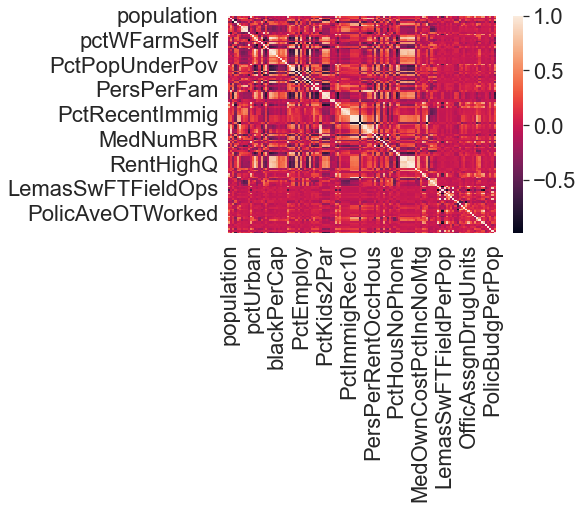

In [58]:
# Correlation matrix for the features in the data set
correlationMatrix = imputedData.corr()
figure = sns.heatmap(correlationMatrix)

    (d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m, in which s is sample standard deviation and m is sample mean..

In [59]:
# Define dictionary where the coefficients will be stored
coefficientOfVariationDict = {}

# Calculate the CVs for each column
for columnName, columnData in imputedData.items():
    stdDev = np.std(columnData)
    mean = np.mean(columnData)
    coefficientOfVariation = stdDev / mean
    coefficientOfVariationDict[columnName] = coefficientOfVariation

# Print the dictionary with the CVs
print('The following is a dictionary with the coefficient of variations for each column:\n')
print(coefficientOfVariationDict)

The following is a dictionary with the coefficient of variations for each column:

{'population': 2.20294993386533, 'householdsize': 0.3532097004119048, 'racepctblack': 1.4105665605340265, 'racePctWhite': 0.3237003633601353, 'racePctAsian': 1.3588213380942629, 'racePctHisp': 1.6138729571484036, 'agePct12t21': 0.36574812216270847, 'agePct12t29': 0.2906199873800477, 'agePct16t24': 0.4950363361780536, 'agePct65up': 0.4233355166105009, 'numbUrban': 2.0012416335137146, 'pctUrban': 0.6386886583257786, 'medIncome': 0.5796080008727312, 'pctWWage': 0.32762787426405326, 'pctWFarmSelf': 0.6998545594658827, 'pctWInvInc': 0.3591498556991753, 'pctWSocSec': 0.3684202133633635, 'pctWPubAsst': 0.6988551987450082, 'pctWRetire': 0.3495513990736716, 'medFamInc': 0.5275995387856797, 'perCapInc': 0.5454965924474838, 'whitePerCap': 0.5074249049035463, 'blackPerCap': 0.5893211744649158, 'indianPerCap': 0.8094820310422648, 'AsianPerCap': 0.6060418273404315, 'OtherPerCap': 0.6704763858174291, 'HispPerCap': 0.47

    e) Pick (√128) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?

Pairwise plots between the 11 features with the highest CV's:


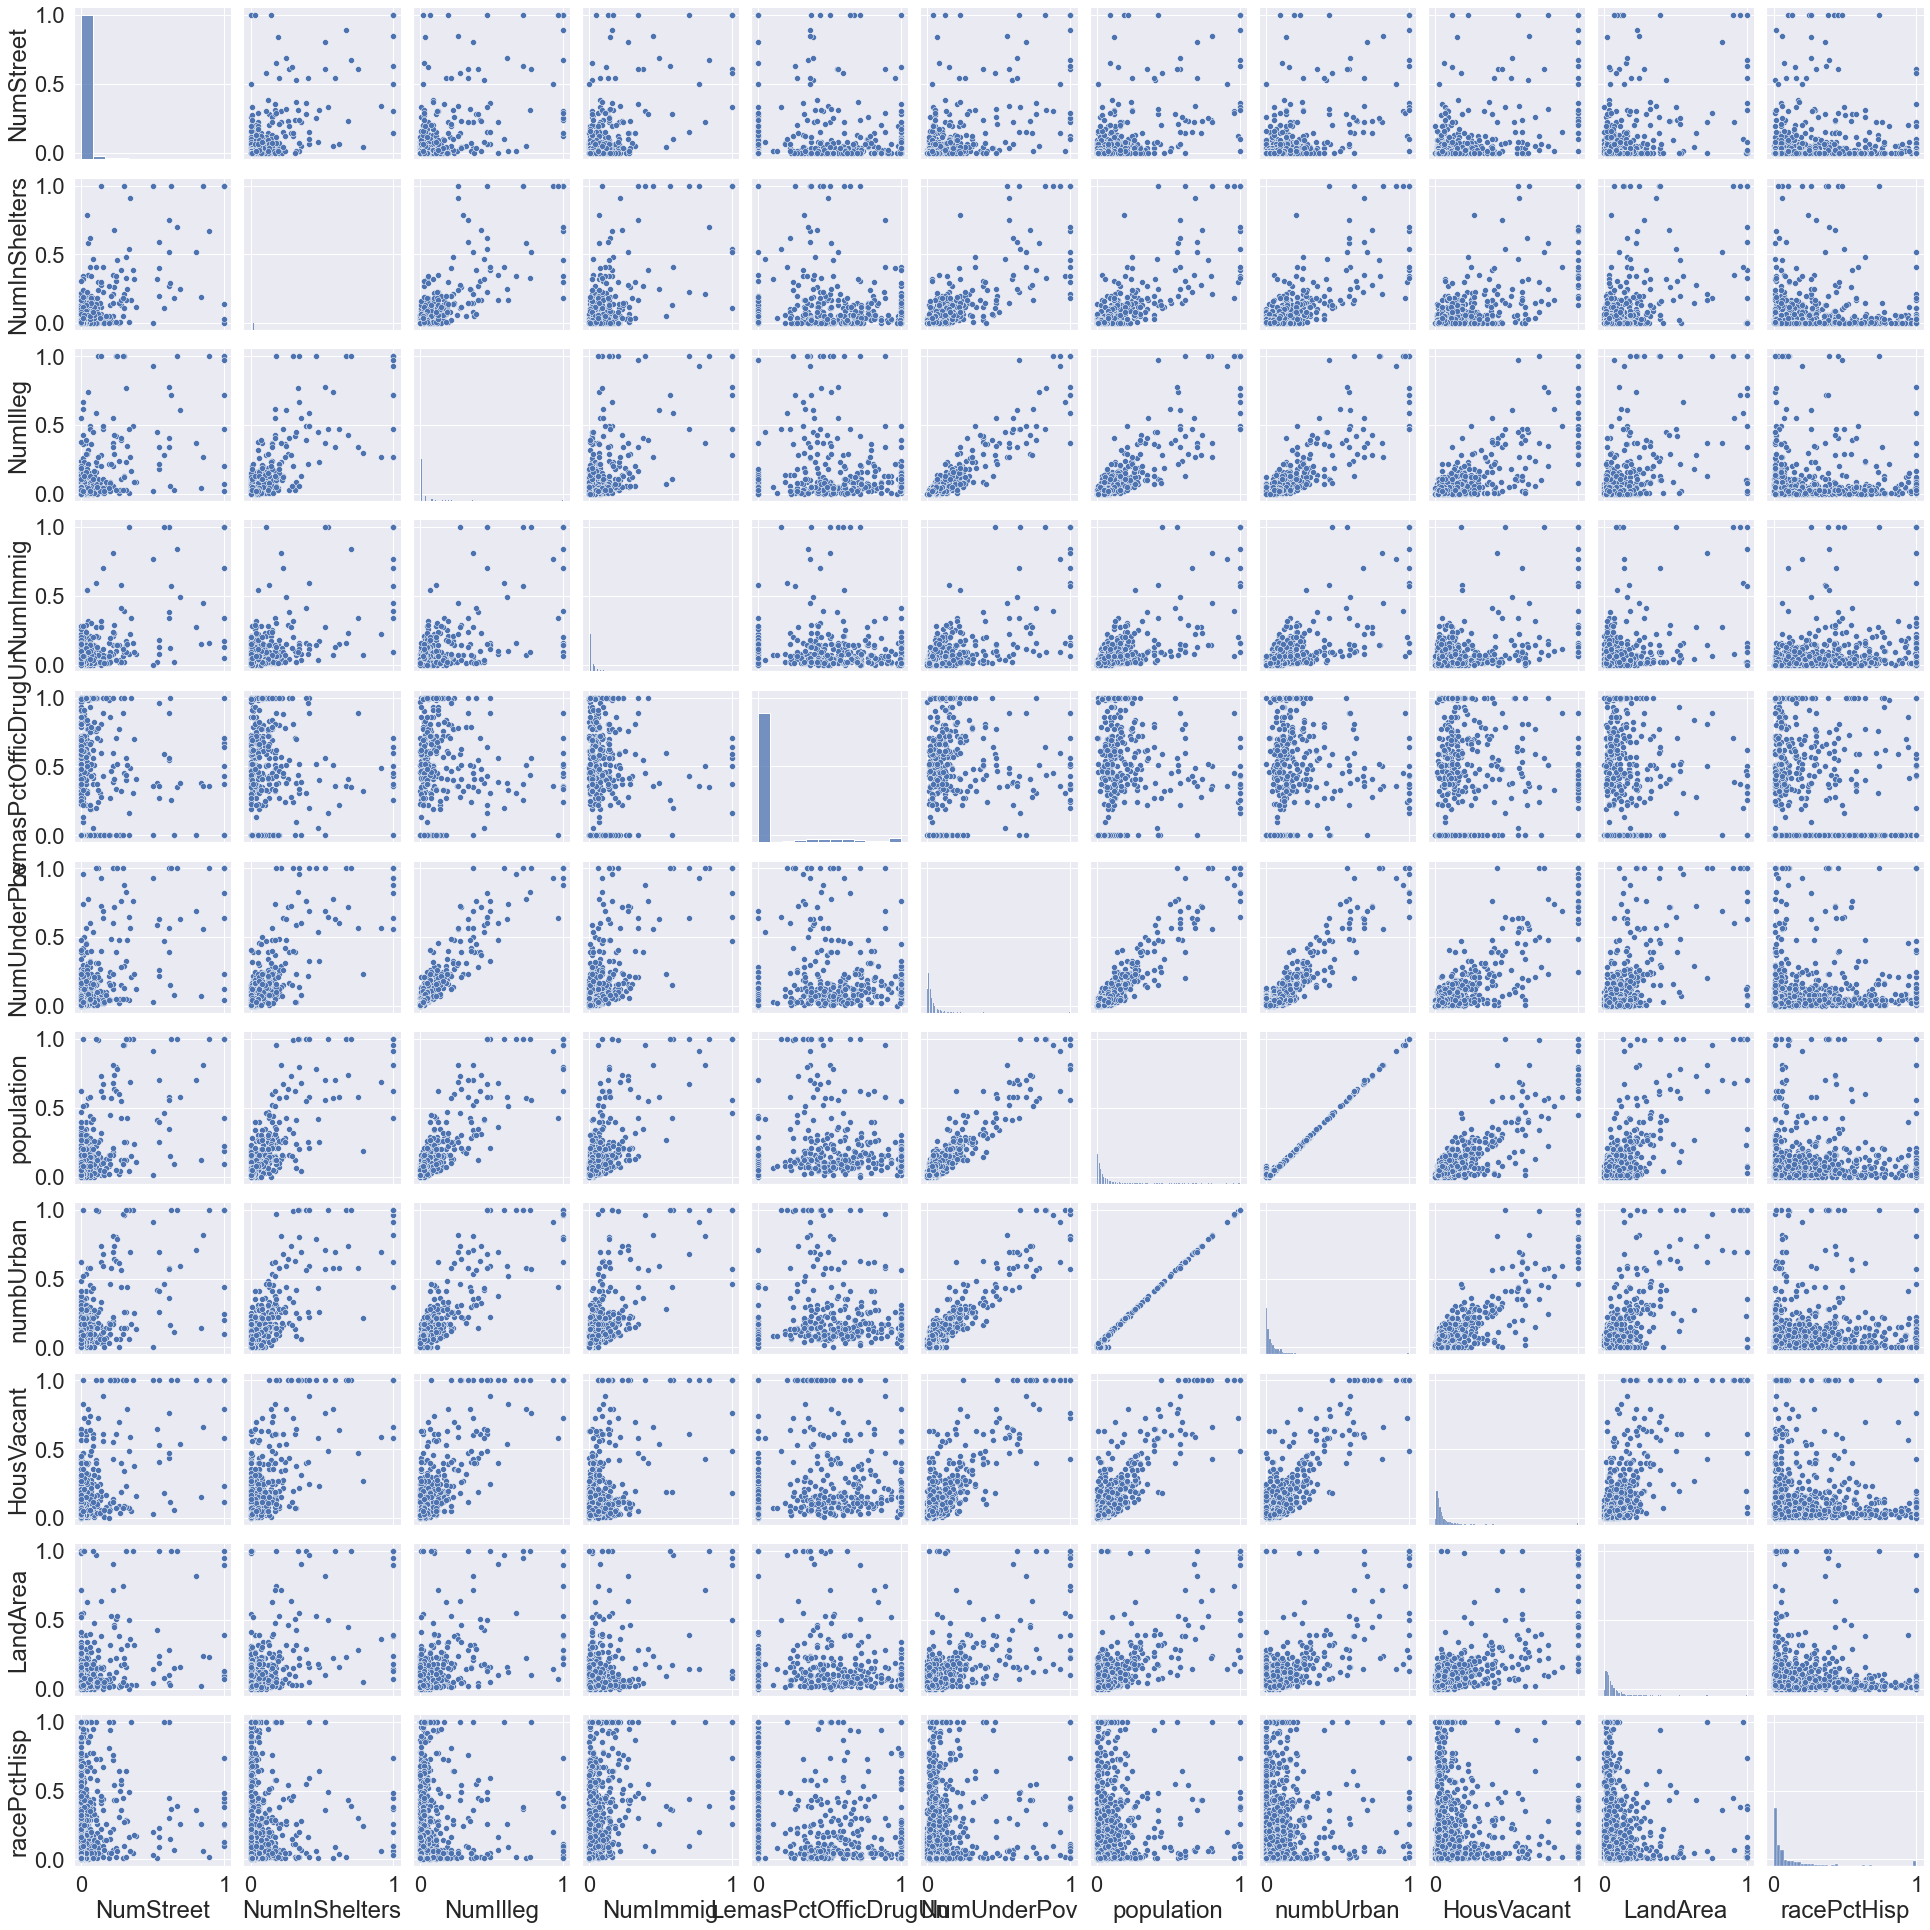

In [60]:
# Sort the dictionary and get the 11 highest CVs 
highestCVFeatures = dict(sorted(coefficientOfVariationDict.items(), key = itemgetter(1), reverse = True)[:11])
dataCV = imputedData[highestCVFeatures.keys()]


# Print pairplot of the features with the highest CVs
print('Pairwise plots between the 11 features with the highest CV\'s:')
sns.set(font_scale=2)
sns.pairplot(dataCV, dropna=True)

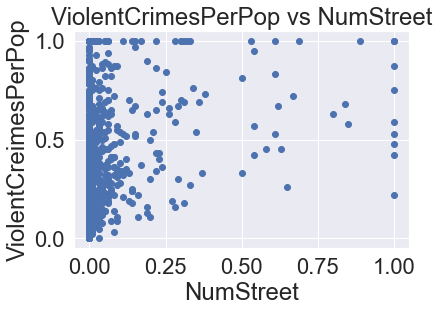

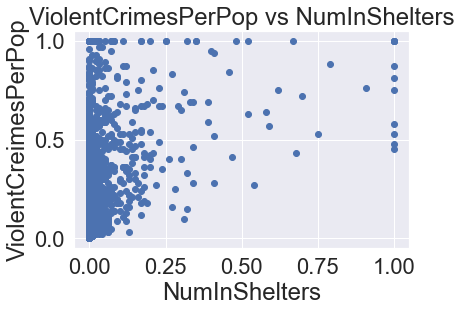

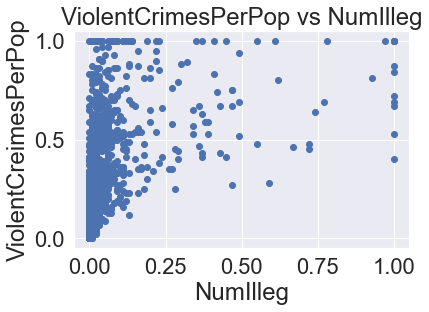

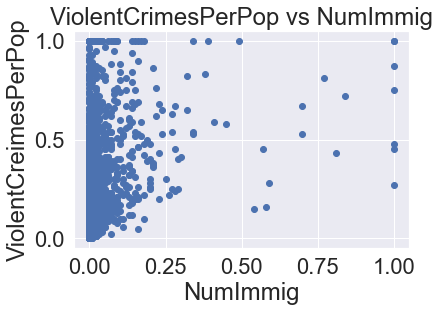

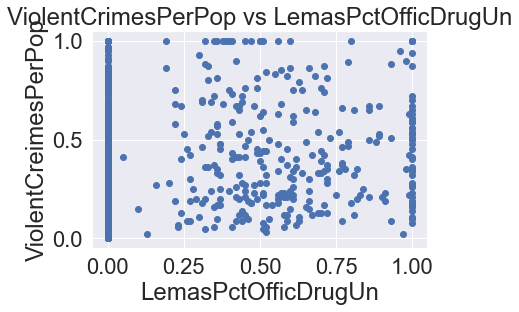

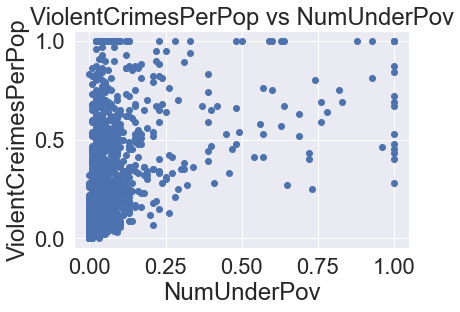

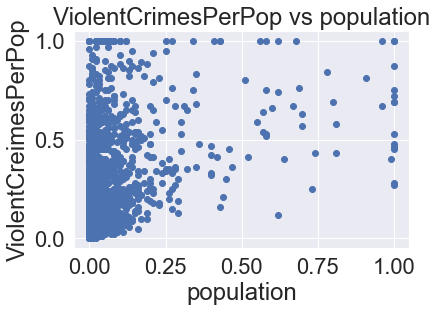

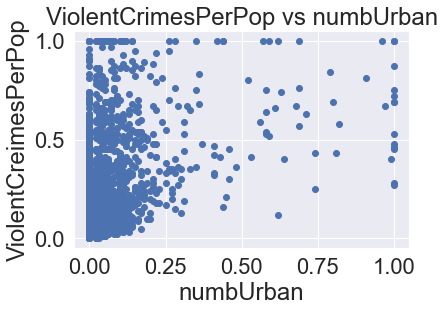

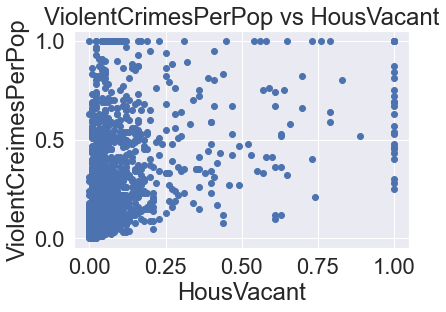

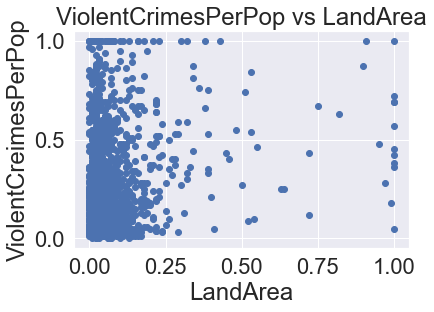

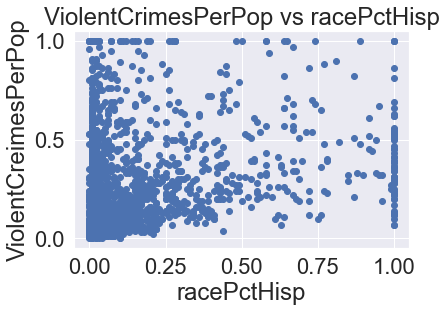

In [61]:
# Plot scatter plots for the response vs each of the features with the highest CVs
for columnName, columnData in dataCV.items():
    xAxis = columnData
    yAxis = imputedData['ViolentCrimesPerPop']
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(xAxis, yAxis)
    ax.set_xlabel(columnName)
    ax.set_ylabel('ViolentCreimesPerPop')
    ax.set_title(f'ViolentCrimesPerPop vs {columnName}')
    plt.show()

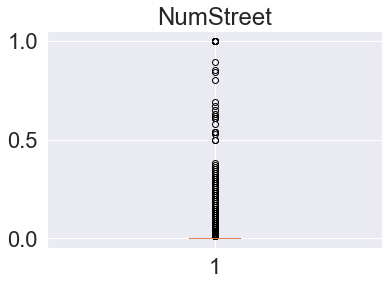

<Figure size 360x576 with 0 Axes>

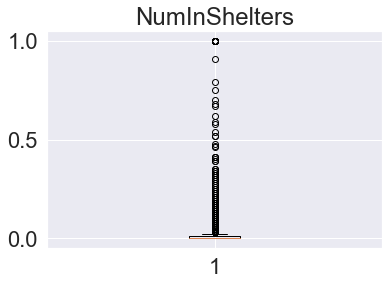

<Figure size 360x576 with 0 Axes>

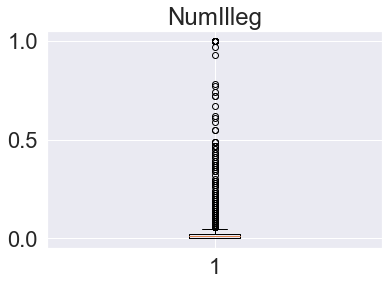

<Figure size 360x576 with 0 Axes>

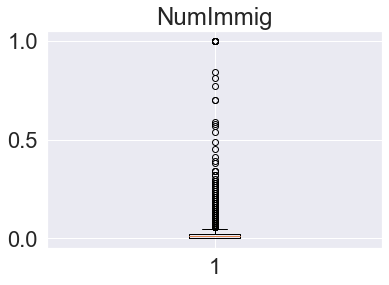

<Figure size 360x576 with 0 Axes>

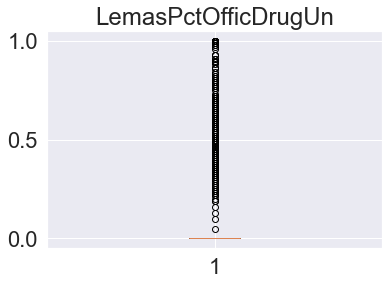

<Figure size 360x576 with 0 Axes>

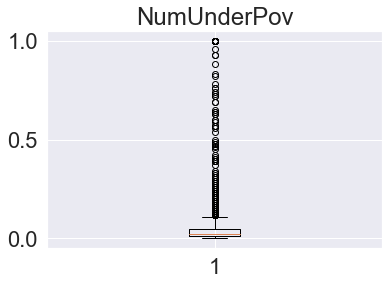

<Figure size 360x576 with 0 Axes>

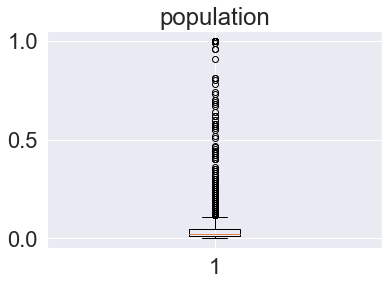

<Figure size 360x576 with 0 Axes>

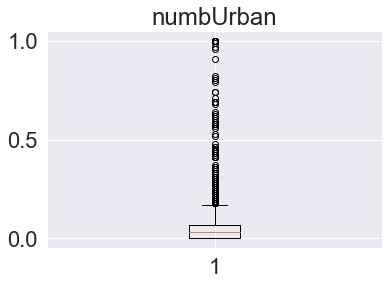

<Figure size 360x576 with 0 Axes>

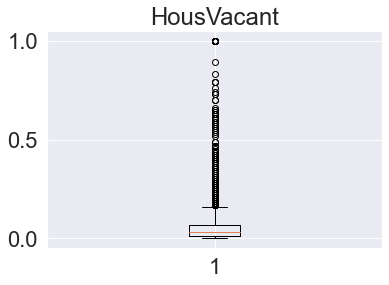

<Figure size 360x576 with 0 Axes>

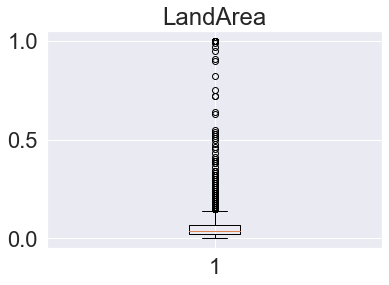

<Figure size 360x576 with 0 Axes>

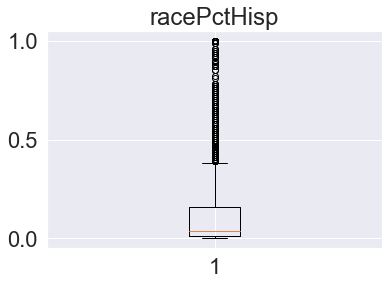

<Figure size 360x576 with 0 Axes>

In [62]:
# Plot the box plots for each of the features with the highest CVs
for columnName, columnData in dataCV.items():
    plt.boxplot(columnData)
    plt.title(columnName)
    plt.figure(figsize=(5,8))
    plt.show()

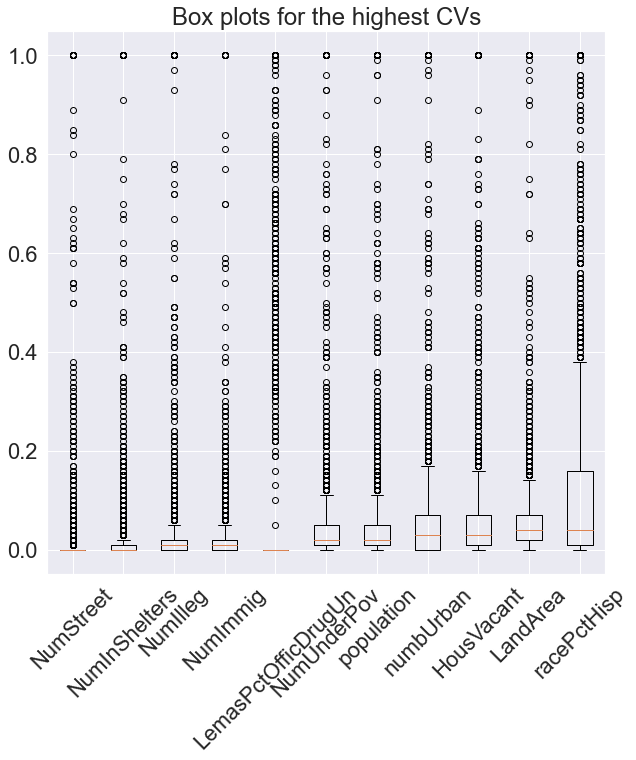

In [63]:
# Define lists to store data
compareData = []
axes = []

# Iterate over data with CVs and append to lists
for columnName, columnData in dataCV.items():
    compareData.append(columnData)
    axes.append(columnName)

# Show how the box plots compare to one another
figure = plt.figure(figsize=(10,10))
plt.boxplot(compareData)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11], axes, rotation=45)
plt.title('Box plots for the highest CVs')
plt.show()

Can you draw conclusions about significance of those features, just by the scatter plots?

    (f) Fit a linear model using least squares to the training set and report the test error.

In [64]:
# Divide the data into training and test sets. The first 1495 rows of the imputed data are the training set. 
dataX = imputedData.drop(columns=['ViolentCrimesPerPop'])
dataY = imputedData['ViolentCrimesPerPop'].values

# Use the train_test_split function to get the sets
trainingX = imputedData.iloc[0:1495,:121]
testingX = imputedData.iloc[1495:,:121]
trainingY = imputedData.iloc[0:1495,121]
testingY = imputedData.iloc[1495:,121]

# Fit linear regression model using least squares to the training set. 
linearRegressionModel = LinearRegression().fit(trainingX, trainingY)
model = sm.OLS(trainingY, trainingX)
output = model.fit()
output.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        PolicBudgPerPop   R-squared (uncentered):                   0.992
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1464.
Date:                Wed, 27 Oct 2021   Prob (F-statistic):                        0.00
Time:                        00:33:30   Log-Likelihood:                          3892.6
No. Observations:                1495   AIC:                                     -7543.
Df Residuals:                    1374   BIC:                                     -6901.
Df Model:                         121                                                  
Covariance Type:            nonrobust                                                  
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
population               -0.0106      0.067     -0.158      0.874      -0.142       0.121
householdsize             0.0067      0.014      0.493      0.622      -0.020       0.034
racepctblack              0.0096      0.008      1.140      0.254      -0.007       0.026
racePctWhite              0.0132      0.009      1.413      0.158      -0.005       0.032
racePctAsian             -0.0120      0.006     -2.073      0.038      -0.023      -0.001
racePctHisp              -0.0009      0.009     -0.099      0.921      -0.019       0.017
agePct12t21               0.0095      0.018      0.523      0.601      -0.026       0.045
agePct12t29              -0.0371      0.026     -1.438      0.151      -0.088       0.014
agePct16t24               0.0130      0.028      0.470      0.638      -0.041       0.067
agePct65up                0.0046      0.017      0.262      0.793      -0.029       0.039
numbUrban                 0.0353      0.065      0.542      0.588      -0.093       0.163
pctUrban                 -0.0042      0.003     -1.589      0.112      -0.009       0.001
medIncome                -0.0493      0.028     -1.741      0.082      -0.105       0.006
pctWWage                  0.0057      0.015      0.381      0.703      -0.024       0.035
pctWFarmSelf             -0.0013      0.003     -0.391      0.696      -0.008       0.005
pctWInvInc               -0.0042      0.011     -0.369      0.712      -0.026       0.018
pctWSocSec               -0.0004      0.018     -0.020      0.984      -0.035       0.034
pctWPubAsst              -0.0028      0.008     -0.371      0.711      -0.018       0.012
pctWRetire               -0.0032      0.006     -0.521      0.602      -0.015       0.009
medFamInc                 0.0409      0.026      1.550      0.121      -0.011       0.093
perCapInc                -0.0062      0.031     -0.199      0.842      -0.067       0.055
whitePerCap               0.0143      0.025      0.570      0.569      -0.035       0.064
blackPerCap              -0.0002      0.004     -0.051      0.959      -0.008       0.008
indianPerCap              0.0007      0.003      0.220      0.826      -0.006       0.007
AsianPerCap              -0.0002      0.003     -0.068      0.946      -0.006       0.006
OtherPerCap              -0.0008      0.003     -0.267      0.789      -0.007       0.005
HispPerCap               -0.0025      0.004     -0.622      0.534      -0.010       0.005
NumUnderPov              -0.0635      0.027     -2.365      0.018      -0.116      -0.011
PctPopUnderPov            0.0045      0.010      0.428      0.669      -0.016       0.025
PctLess9thGrade          -0.0102      0.011     -0.929      0.353      -0.032       0.011
PctNotHSGrad  

In [65]:
# Report the test MSE for the model
predTest = output.predict(testingX)
meanSquaredError = mean_squared_error(testingY, predTest)
print(f'Test MSE: {meanSquaredError}')

Test MSE: 0.02506352215216691


    (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.

In [66]:
# Get a list of all lambdas
lambdas = [10**i for i in [*range(-4, 5, 1)]]

# Find the optimal value for lambda with cross-validation
ridgeCrossValidation = RidgeCV(alphas=lambdas)
ridgeCrossValidation.fit(trainingX, trainingY)
optimalLambda = ridgeCrossValidation.alpha_
print(f'The optimal lambda for the model is {optimalLambda}')

# Fit a ridge regression using lambda=10
ridgeOptimalLambda = Ridge(alpha=optimalLambda)
ridgeOptimalLambda.fit(trainingX, trainingY)

# Report the test MSE on ridge regression model with the best lambda selected
meanSquaredError = mean_squared_error(testingY, ridgeOptimalLambda.predict(testingX))
print(f'Test MSE: {meanSquaredError}')

The optimal lambda for the model is 0.01
Test MSE: 0.0012954153804285663


    (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report the test error obtained, along with a list of the variables selected by the model. Repeat with standardized2 features. Report the test error for both cases and compare them.

In [67]:
# Get a list of all lambdas
lambdas = [10**i for i in [*range(-4, 5, 1)]]

# Find the optimal value for lambda with cross-validation
lassoCrossValidation = LassoCV(alphas=lambdas, cv=10)
lassoCrossValidation.fit(trainingX, trainingY)
optimalLambda = lassoCrossValidation.alpha_
print(f'Optimal lambda using lasso with 10-fold cross validation: {optimalLambda}\n')

# Fit a Lasso using the best lambda
lasso4 = Lasso(alpha=optimalLambda)
lasso4.fit(trainingX, trainingY)

# Report the test MSE on the Lasso with the best lambda selected
meanSquaredError = mean_squared_error(testingY, lasso4.predict(testingX))
print(f'Lasso Test MSE: {meanSquaredError}\n')

# Find and print the variables selected by the Lasso
features = columnNames[:-1]
coefficients = lasso4.coef_
coefficients = np.abs(coefficients)
selection = np.array(features[:-1])[coefficients>0]
selection = list(selection)
print(f'Variables selected by the Lasso: {selection}\n')

Optimal lambda using lasso with 10-fold cross validation: 0.0001

Lasso Test MSE: 0.0014706913078921682

Variables selected by the Lasso: ['racePctWhite', 'pctUrban', 'medFamInc', 'indianPerCap', 'AsianPerCap', 'PctLess9thGrade', 'PctUnemployed', 'PctEmplManu', 'FemalePctDiv', 'PctYoungKids2Par', 'PctTeen2Par', 'PctImmigRecent', 'PctRecImmig10', 'PctHousOccup', 'MedYrHousBuilt', 'PctBornSameState', 'PctSameState85', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasTotReqPerPop', 'PolicPerPop', 'RacialMatchCommPol', 'PctPolicWhite', 'PctPolicBlack', 'PctPolicAsian', 'OfficAssgnDrugUnits', 'PolicAveOTWorked', 'PolicCars', 'LemasGangUnitDeploy']



In [68]:
# Standardize the training data
scaler = StandardScaler()
standardTrainingX = scaler.fit_transform(trainingX)
standardTestingX = scaler.fit_transform(testingX)

# Repeat the Lasso on the training and test sets and get the optimal lambda
standardLassoCrossValidation = LassoCV(alphas=lambdas, cv=10, normalize=True)
standardLassoCrossValidation.fit(standardTrainingX, trainingY)
optimalLambda = standardLassoCrossValidation.alpha_
print(f'The optimal lambda for the model is {optimalLambda}\n')

# Fit the Lasso with the optimal lambda
standardLasso4 = Lasso(alpha=optimalLambda)
standardLasso4.fit(standardTrainingX, trainingY)

# Report the test MSE for the Lasso with the optimal lambda
meanSquaredError = mean_squared_error(testingY, standardLasso4.predict(standardTestingX))
print(f'Lasso Test MSE: {meanSquaredError}\n')

# Find and print the variables selected by the Lasso for the standardized data
standardFeatures = columnNames[:-1]
standardCoefficients = standardLasso4.coef_
standardCoefficients = np.abs(standardCoefficients)

selection = np.array(standardFeatures[:-1])[standardCoefficients>0]
selection = list(selection)
print(f'Variables selected by the Lasso: {selection}\n')

The optimal lambda for the model is 0.0001

Lasso Test MSE: 0.0017653184667644661

Variables selected by the Lasso: ['racePctAsian', 'agePct12t21', 'agePct12t29', 'agePct65up', 'pctUrban', 'pctWFarmSelf', 'pctWPubAsst', 'pctWRetire', 'blackPerCap', 'indianPerCap', 'HispPerCap', 'NumUnderPov', 'PctLess9thGrade', 'PctUnemployed', 'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'FemalePctDiv', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent', 'PctRecImmig10', 'PctNotSpeakEnglWell', 'PctLargHouseFam', 'PctLargHouseOccup', 'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant', 'PctHousOccup', 'PctHousOwnOcc', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt', 'OwnOccLowQuart', 'RentLowQ', 'RentHighQ', 'MedOwnCostPctIncNoMtg', 'NumInShelters', 'NumStreet', 'PctForeignBorn', 'PctBornSameState', 'PctSameHouse85', 'PctSameCity85', 'PctSameState85', 'LemasSwornFT', 'LemasSwFTPerPop', 'LemasSwFTFieldOps', 'LemasSwFTF

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


The test MSE for the standardized data is larger than the test MSE for the non-standardized data.

    (i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.

In [69]:
# Scale the training data 
scaler = StandardScaler().fit(trainingX)
scaledTrainingX = pd.DataFrame(scaler.transform(trainingX))
scaledTestingX = pd.DataFrame(scaler.transform(testingX))

# Get the total number of components and define the kFold CV object
componentsLength = len(trainingX.columns.values)
kFold = KFold(n_splits=10, shuffle=True, random_state=1)
regressionModel = LinearRegression()
mse = []

# Fit the PCA model with the scaled training data
pca = PCA().fit(scaledTrainingX)
reducedTrainingX = pd.DataFrame(pca.transform(scaledTrainingX))

# Get all the cross validation scores to select the best model 
for m in range(componentsLength):
    score = cross_val_score(regressionModel, reducedTrainingX.loc[:,:m], trainingY, scoring='neg_mean_squared_error', cv=kFold).mean()*-1
    mse.append(score)

In [70]:
# Get the minimum score to get the optimal M from all the models
optimalM = np.argmin(mse)
print(f'The optimal M is {optimalM}')

# Run a regression model with the optimal M
regressionModel = LinearRegression().fit(reducedTrainingX.loc[:,:optimalM], trainingY)
reducedTestingX = pd.DataFrame(pca.transform(testingX))
predict = regressionModel.predict(reducedTestingX.loc[:,:optimalM])

# Get the test MSE and the R-Squared from the model 
meanSquaredError = mean_squared_error(testingY, predict)
rSquared = r2_score(testingY, predict)
print(f'The test error MSE is {meanSquaredError} and R2 is {rSquared}')

The optimal M is 98
The test error MSE is 0.007630714256595684 and R2 is -0.339288723115275


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(


    (j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost3 to fit the model tree. Determine α (the regularization term) using cross-validation.

In [71]:
# Get a list of the values that will be used for alphas and define the kFold object
alphaValues = [10**i for i in [*range(-4, 5, 1)]]
kFold = KFold(n_splits=10, shuffle=True, random_state=1)

# Iterate over alpha values and train the XGBRegressor model. Get the cross validation scores to choose the best alpha
error = []
for alpha in alphaValues:
    treeModel = XGBRegressor(reg_alpha=alpha, objective='reg:squarederror')
    score = cross_val_score(treeModel, scaledTrainingX, trainingY, cv=kFold, scoring='neg_mean_squared_error').mean()*-1
    error.append(score)

In [72]:
# Get the optimal alpha and print it
optimalAlpha = alphaValues[np.argmin(error)]
print(f'The optimal alpha is {optimalAlpha}')

# Train the XGBRegressor with the best alpha
treeModel = XGBRegressor(reg_alpha=optimalAlpha, objective='reg:squarederror').fit(scaledTrainingX, trainingY)
predict = treeModel.predict(scaledTestingX)

# Get the test MSE and the R-Squared for the model
meanSquaredError = mean_squared_error(testingY, predict)
rSquared = r2_score(testingY, predict)
print(f'The test error MSE is {meanSquaredError} and R2 is {rSquared}')

The optimal alpha is 0.001
The test error MSE is 0.001985052153794455 and R2 is 0.6515977567794979


2. Tree-Based Methods

    (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/APS+Failure+at+Scania+Trucks . The dataset contains a training set and a test set. The training set contains 60,000 rows, of which 1,000 belong to the positive class and 171 columns, of which one is the class column. All attributes are numeric.

In [ ]:
# Read the data from the files
testingData = pd.read_csv('../data/aps_failure_test_set.csv', skiprows = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
trainingData = pd.read_csv('../data/aps_failure_training_set.csv', skiprows = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

    (b) Data Preparation This data set has missing values. When the number of data with missing values is significant, discarding them is not a good idea. 

    i. Research what types of techniques are usually used for dealing with data with missing values.5 Pick at least one of them and apply it to this data in the next steps.6

In [ ]:
# Replace the na value with NaN in the test data to prepare for imputation
testingData.replace('na', np.NaN, inplace=True)

# Define the imputer with the mean strategy
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Impute the data by iterating over the testing data
imputedTestingData = testingData
for columnName, columnData in testingData.items():
    if columnName != 'class':
        columnData = np.array(columnData).reshape((-1, 1))
        imputedColumn = imputer.fit_transform(columnData).T
        imputedColumn = imputedColumn[0].tolist()
        imputedTestingData[columnName] = imputedColumn

In [ ]:
# Replace the na value with NaN in the test data to prepare for imputation
trainingData.replace('na', np.NaN, inplace=True)

# Define the imputer with the mean strategy
imputer = SimpleImputer(missing_values=np.NaN, strategy='mean')

# Impute the data by iterating over the training data
imputedTrainingData = trainingData
for columnName, columnData in trainingData.items():
    if columnName != 'class':
        columnData = np.array(columnData).reshape((-1, 1))
        imputedColumn = imputer.fit_transform(columnData).T
        imputedColumn = imputedColumn[0].tolist()
        imputedTrainingData[columnName] = imputedColumn

In [ ]:
# Define the training and testing X and Ys 
trainingXAPS = imputedTrainingData.drop(columns='class')
trainingYAPS = imputedTrainingData['class'].values
testingXAPS = imputedTestingData.drop(columns='class')
testingYAPS = imputedTestingData['class'].values

    ii. For each of the 170 features, calculate the coefficient of variation CV = s/m, where s is sample standard deviation and m is sample mean.


In [ ]:
# Define dictionary to store the CVs for each column in the training data
trainingCoefficientOfVariation = {}

# Calculate the CVs for each column and store them in a dictionary
for columnName, columnData in trainingXAPS.items():
    standardDeviation = np.std(columnData)
    mean = np.mean(columnData)
    cv = standardDeviation / mean
    trainingCoefficientOfVariation[columnName] = cv
    
# Print the dictionary with the CVs
print('Dictionary where the keys are the column names and the values are the CVs:')
print(trainingCoefficientOfVariation)

In [ ]:
# Define dictionary to store the CVs for each column in the testing data
testingCoefficientOfVariation = {}

# Calculate the CVs for each column and store them in a dictionary
for columnName, columnData in testingXAPS.items():
    standardDeviation = np.std(columnData)
    mean = np.mean(columnData)
    cv = standardDeviation / mean
    testingCoefficientOfVariation[columnName] = cv
    
# Print the dictionary with the CVs   
print('Dictionary where the keys are the column names and the values are the CVs:')
print(testingCoefficientOfVariation)

    iii. Plot a correlation matrix for your features using pandas or any other tool.

In [ ]:
# Create and plot the correlation matrix on the training data
trainingCorrelationMatrix = trainingXAPS.corr()
trainingFigure = sns.heatmap(trainingCorrelationMatrix)

In [ ]:
# Create and plot the correlation matrix on the testing data
testingCorrelationMatrix = testingXAPS.corr()
testingFigure = sns.heatmap(testingCorrelationMatrix)

    iv. Pick (√170) features with highest CV , and make scatter plots and box plots for them, similar to those on p. 129 of ISLR. Can you draw conclusions about significance of those features, just by the scatter plots? This does not mean that you will only use those features in the following questions. We picked them only for visualization.

In [ ]:
# Getting the 13 features with the highest CVs of the train data 
highestCVFeatures = dict(sorted(trainingCoefficientOfVariation.items(), key = itemgetter(1), reverse = True)[:13])
trainingDataCV = trainingXAPS[highestCVFeatures.keys()]

In [ ]:
# Plot pairplots for the 13 features. This cell takes a lot of time ot run given the amount of entries
print('Pairwise plots between the 13 features with the highest CV\'s:')
sns.set(font_scale=2)
sns.pairplot(trainingDataCV, dropna=True)

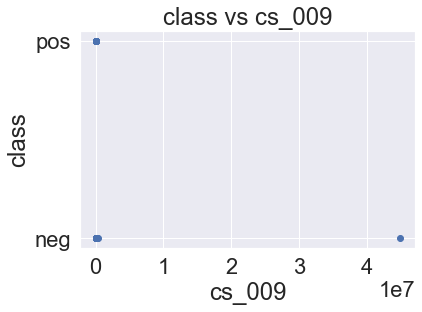

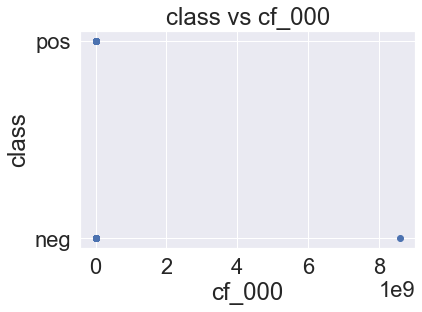

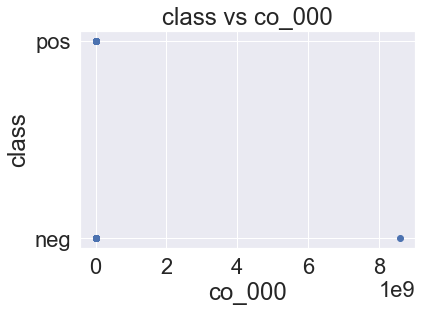

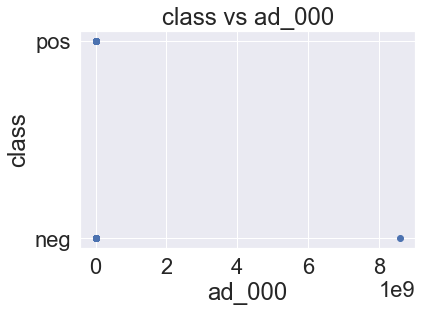

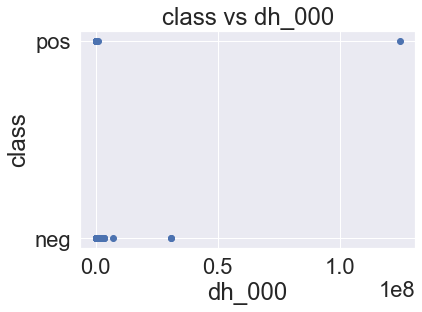

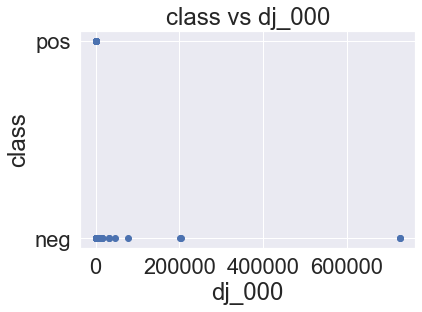

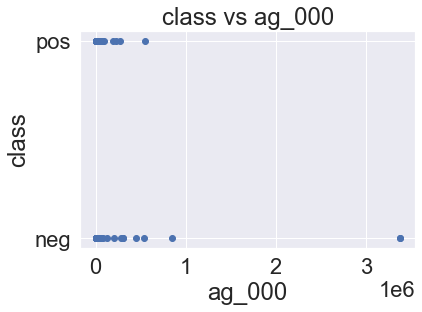

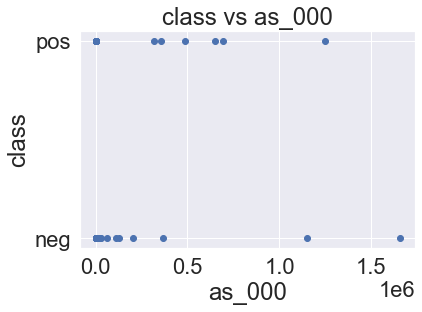

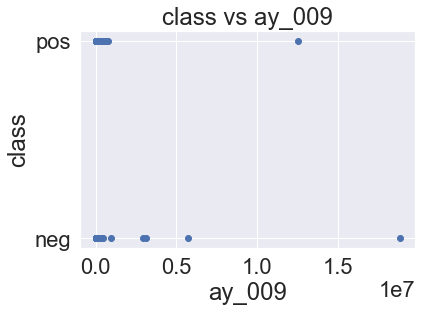

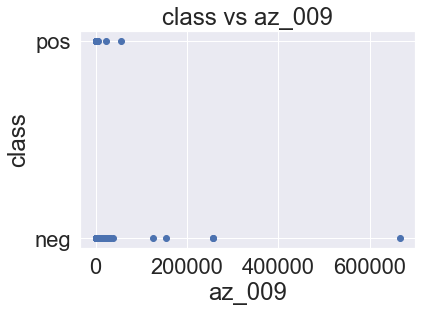

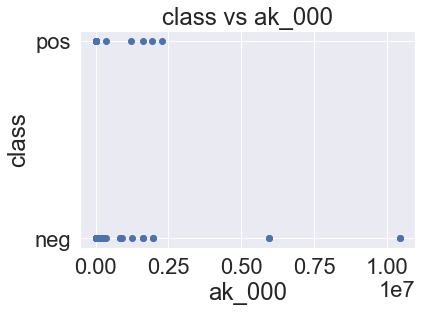

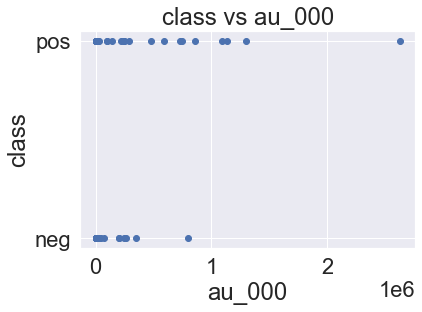

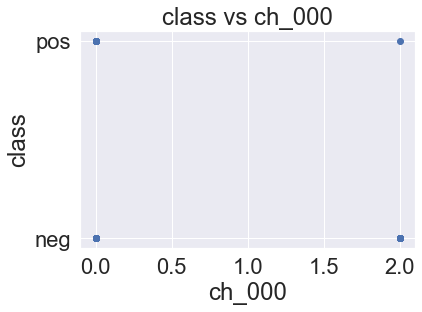

In [29]:
# Plot each of the 13 features with the response
for columnName, columnData in trainingDataCV.items():
    X = columnData
    Y = imputedTrainingData['class']
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(X, Y)
    ax.set_xlabel(columnName)
    ax.set_ylabel('class')
    ax.set_title(f'class vs {columnName}'.format(X, Y))
    plt.show()

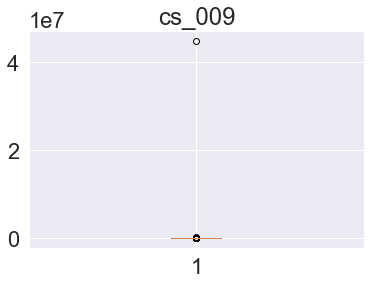

<Figure size 360x720 with 0 Axes>

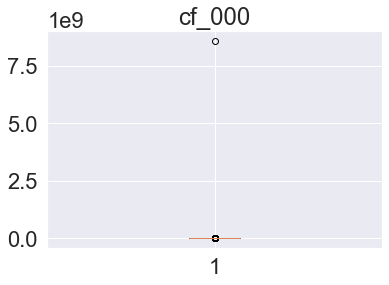

<Figure size 360x720 with 0 Axes>

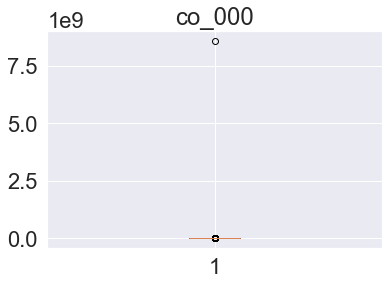

<Figure size 360x720 with 0 Axes>

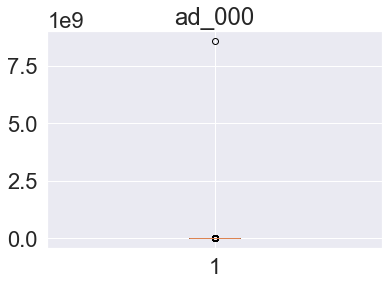

<Figure size 360x720 with 0 Axes>

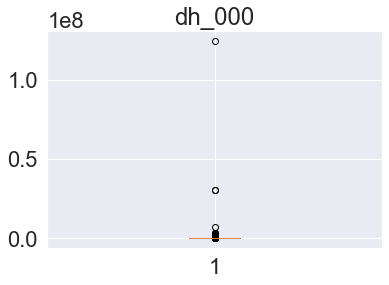

<Figure size 360x720 with 0 Axes>

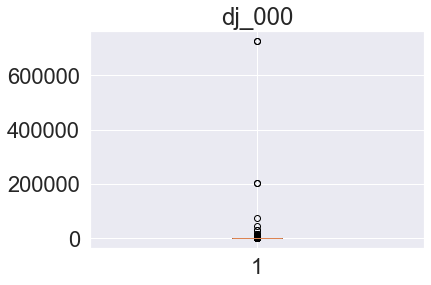

<Figure size 360x720 with 0 Axes>

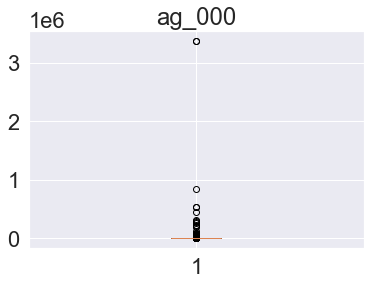

<Figure size 360x720 with 0 Axes>

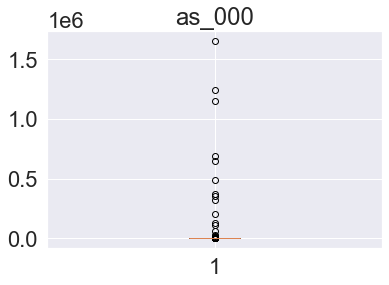

<Figure size 360x720 with 0 Axes>

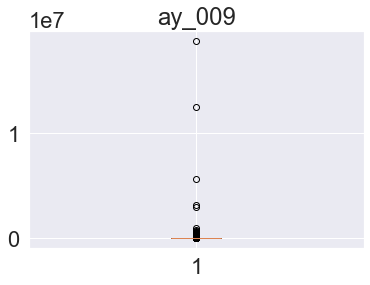

<Figure size 360x720 with 0 Axes>

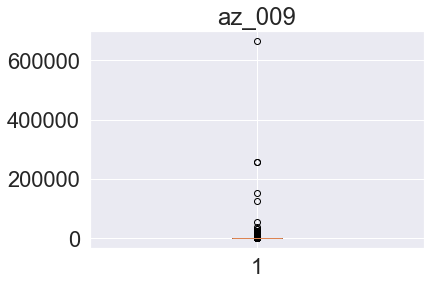

<Figure size 360x720 with 0 Axes>

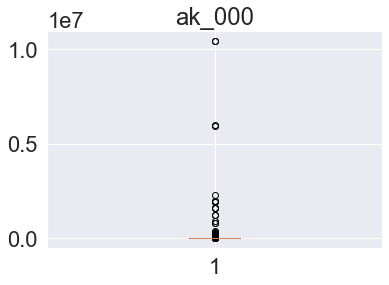

<Figure size 360x720 with 0 Axes>

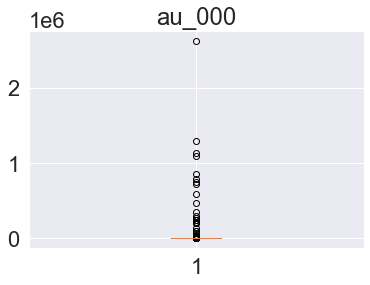

<Figure size 360x720 with 0 Axes>

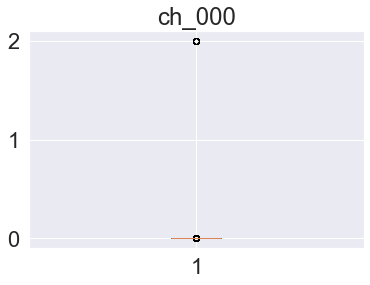

<Figure size 360x720 with 0 Axes>

In [30]:
# Plot each box plot for each of the features with the highest CV of the training data
for columnName, columnData in trainingDataCV.items():
    plt.boxplot(columnData)
    plt.title(columnName)
    plt.figure(figsize=(5,10))
    plt.show()

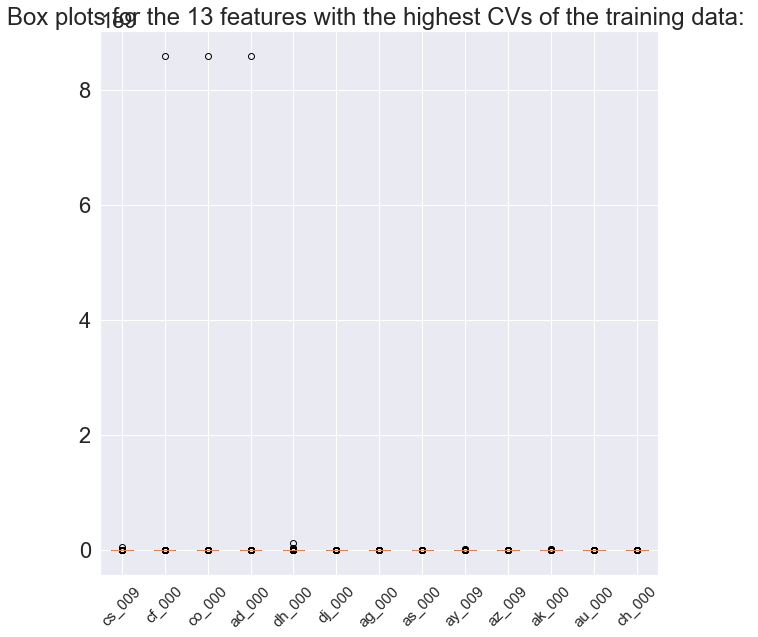

In [31]:
# Showing the boxplots one next to another for comparisson
data = []
axes = []

for columnName, columnData in trainingDataCV.items():
    data.append(columnData)
    axes.append(columnName)

fig = plt.figure(figsize=(10,10))
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],axes,rotation=45,fontsize=15)
plt.title('Box plots for the 13 features with the highest CVs of the training data: ')
plt.show()

In [32]:
# getting the 13 features with the highest CV's of the test data 
highestCVFeatures = dict(sorted(testingCoefficientOfVariation.items(), key = itemgetter(1), reverse = True)[:13])
testingDataCV = testingXAPS[highestCVFeatures.keys()]

In [ ]:
# Plot pairplots for the 13 features. This cell takes a lot of time ot run given the amount of entries
print('Pairwise plots between the 13 features with the highest CV\'s:')
sns.set(font_scale=2)
sns.pairplot(testingDataCV, dropna=True)

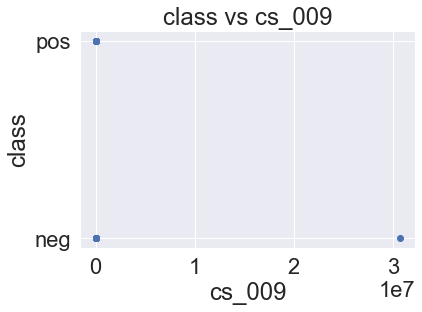

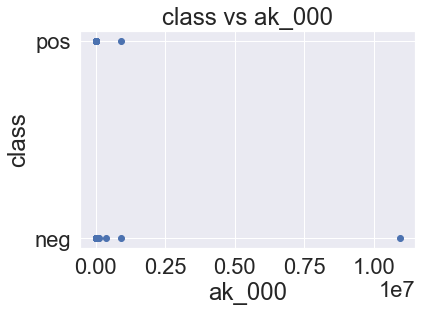

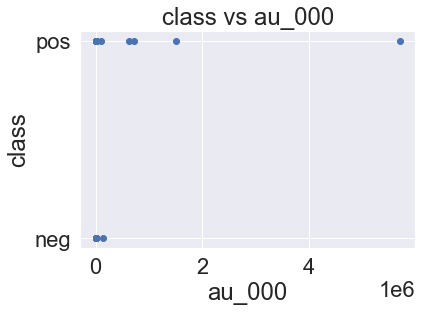

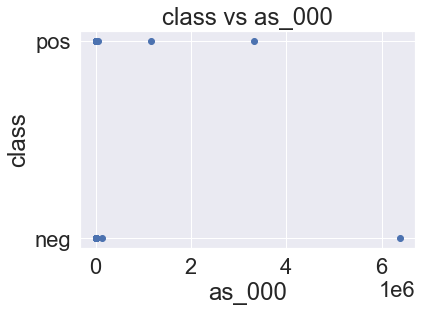

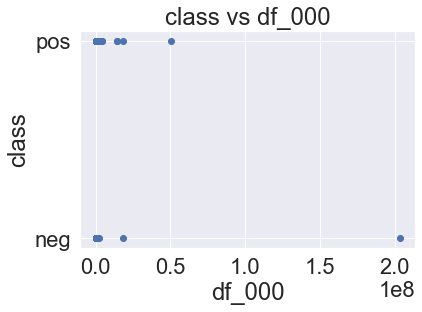

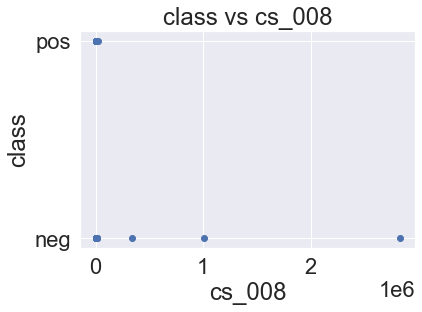

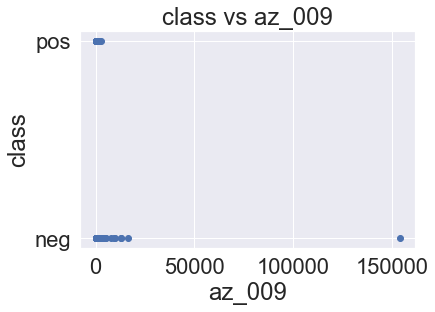

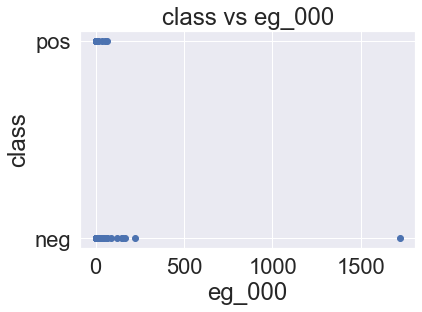

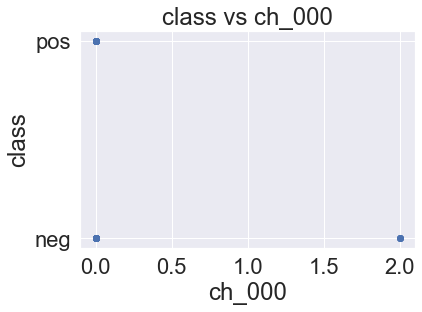

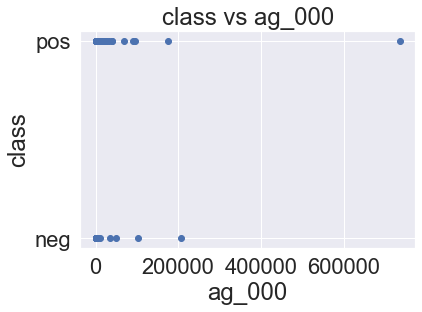

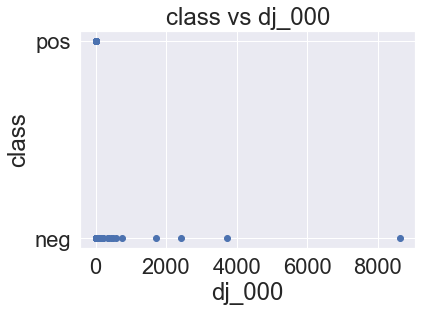

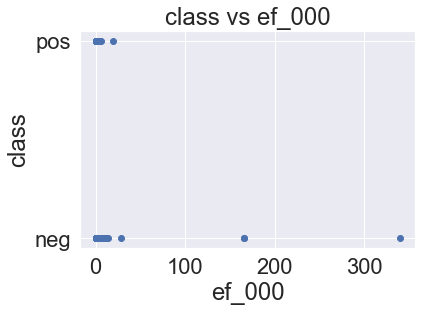

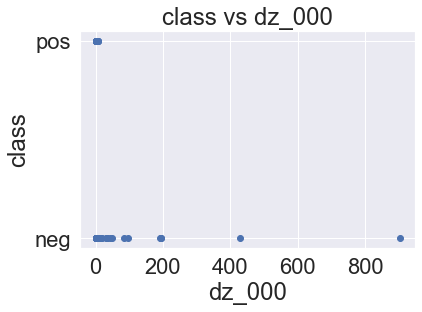

In [33]:
# Plot each of these 13 features with the response
for columnName, columnData in testingDataCV.items():
    X = columnData
    Y = imputedTestingData['class']
    figure = plt.figure
    ax = plt.gca()
    ax.scatter(X, Y)
    ax.set_xlabel(columnName)
    ax.set_ylabel('class')
    ax.set_title(f'class vs {columnName}'.format(X, Y))
    plt.show()

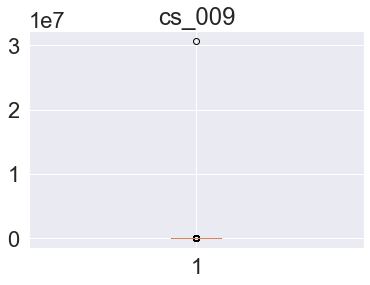

<Figure size 360x720 with 0 Axes>

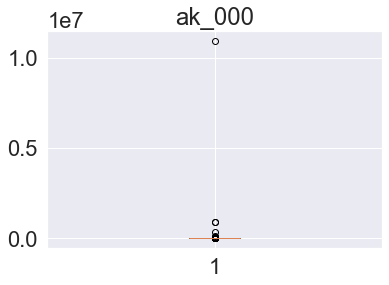

<Figure size 360x720 with 0 Axes>

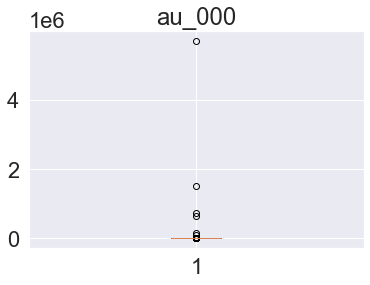

<Figure size 360x720 with 0 Axes>

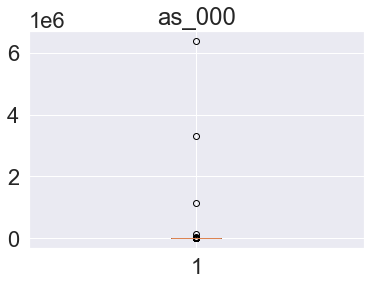

<Figure size 360x720 with 0 Axes>

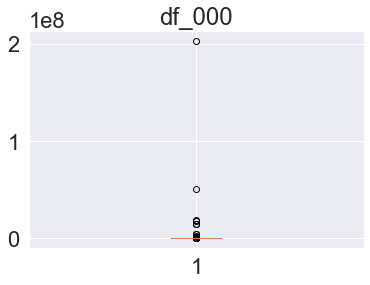

<Figure size 360x720 with 0 Axes>

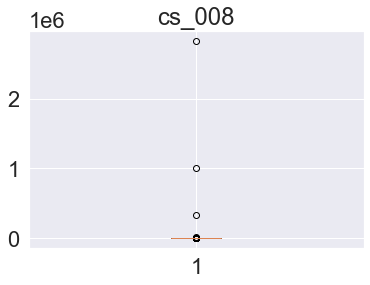

<Figure size 360x720 with 0 Axes>

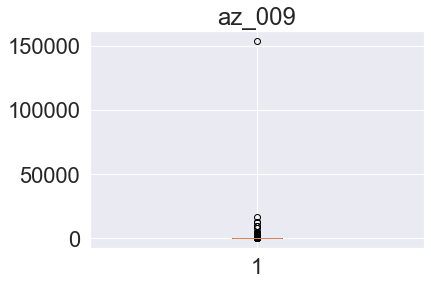

<Figure size 360x720 with 0 Axes>

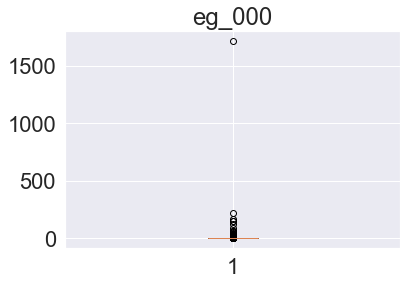

<Figure size 360x720 with 0 Axes>

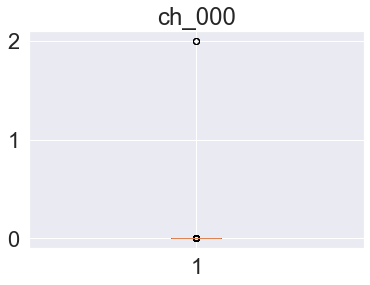

<Figure size 360x720 with 0 Axes>

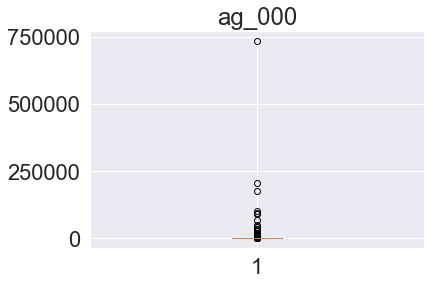

<Figure size 360x720 with 0 Axes>

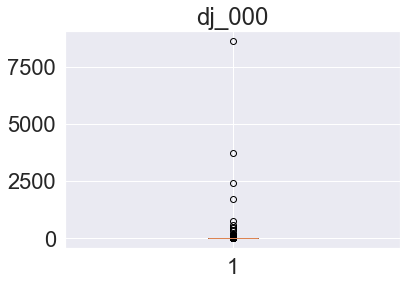

<Figure size 360x720 with 0 Axes>

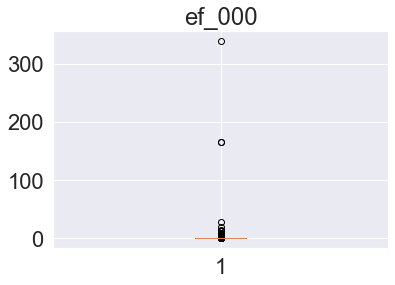

<Figure size 360x720 with 0 Axes>

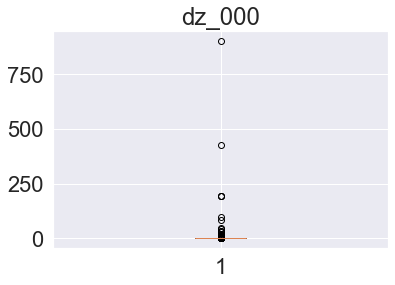

<Figure size 360x720 with 0 Axes>

In [34]:
# Plot each box plot for each of the features with the highest CV of the testing data
for columnName, columnData in testingDataCV.items():
    plt.boxplot(columnData)
    plt.title(columnName)
    plt.figure(figsize=(5,10))
    plt.show()

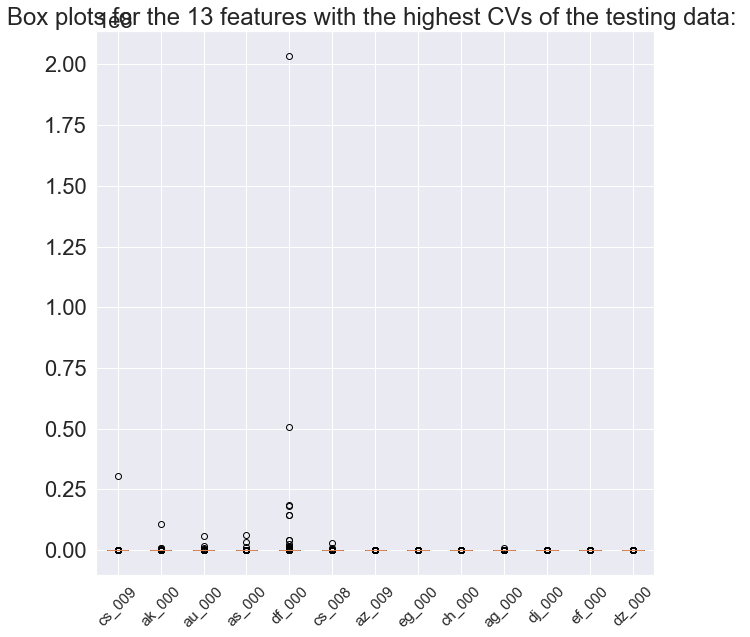

In [36]:
# Showing the boxplots one next to another for comparisson
data = []
axes = []

for columnName, columnData in testingDataCV.items():
    data.append(columnData)
    axes.append(columnName)

fig = plt.figure(figsize=(10,10))
plt.boxplot(data)
plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13],axes,rotation=45,fontsize=15)
plt.title('Box plots for the 13 features with the highest CVs of the testing data: ')
plt.show()

    v. Determine the number of positive and negative data. Is this data set imbalanced?


In [37]:
# Determine the number of positive and negative data in the training set
trainingNegatives = 0
trainingPositives = 0
for i in trainingYAPS:
    if i == 'neg':
        trainingNegatives += 1
    elif i == 'pos':
        trainingPositives += 1
print(f'Training Negatives: {trainingNegatives}\nTraining Positives: {trainingPositives}')

# Determine the number of positive and negative data in the testing set
testingNegatives = 0
testingPositives = 0
for i in testingYAPS:
    if i == 'neg':
        testingNegatives += 1
    elif i == 'pos':
        testingPositives += 1
print(f'Training Negatives: {testingNegatives}\nTraining Positives: {testingPositives}')

Training Negatives: 59000
Training Positives: 1000
Training Negatives: 15625
Training Positives: 375


    (c) Train a random forest to classify the data set. Do NOT compensate for class imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and misclassification for training and test sets and report them (You may use pROC package). Calculate Out of Bag error estimate for your random forset and compare it to the test error.

In [38]:
# Create boolean list for training Y to avoid errors when calculating the AOC, ROC, and MSE
booleanTrainingY = []
for i in trainingYAPS:
    if i == 'neg': 
        booleanTrainingY.append(0)
    elif i == 'pos':
        booleanTrainingY.append(1)
        
# Create boolean list for testing Y to avoid errors when calculating the AOC, ROC, and MSE
booleanTestingY = []
for i in testingYAPS:
    if i == 'neg': 
        booleanTestingY.append(0)
    elif i == 'pos':
        booleanTestingY.append(1)
        
# Training and fitting a random forest classifier
randomForestClassifier = RandomForestClassifier(oob_score=True, random_state=0)
randomForestClassifier.fit(trainingXAPS, booleanTrainingY)

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(oob_score=True, random_state=0)

Confusion Matrix for the test data: 
[[15604    21]
 [  106   269]]


Test True Negative:  15604
Test False Positive:  21
Test False Negative:  106
Test True Positive:  269 

Test Data Misclassifiaction Rate:  0.0079375 

AUC For Test Data:  0.8579946666666667 



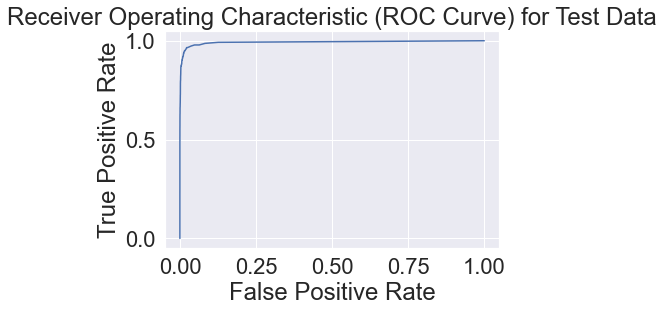

In [39]:
# Predict testing X
forestClassifierPredictTest = randomForestClassifier.predict(testingXAPS)

# Calculate and print confusion matrix 
confusionMatrix = confusion_matrix(booleanTestingY, forestClassifierPredictTest)
print('Confusion Matrix for the test data: ')
print(confusionMatrix)
print('\n')

# Calculate and print the msiclassification rate
trueNegative, falsePositive, falseNegative, truePositive = confusionMatrix.ravel()
print('Test True Negative: ', trueNegative)
print('Test False Positive: ', falsePositive)
print('Test False Negative: ', falseNegative)
print('Test True Positive: ', truePositive, '\n')
errorRate = ((falsePositive + falseNegative)/(falsePositive + falseNegative + trueNegative + truePositive))
print('Test Data Misclassifiaction Rate: ', errorRate, '\n')

# Calculate and print the AUC for the test data
aucScore = roc_auc_score(booleanTestingY, forestClassifierPredictTest, average=None)
print('AUC For Test Data: ', aucScore, '\n')

# Calculate and plot ROC for the test data
testingYProb = randomForestClassifier.predict_proba(testingXAPS)[0:,1]
falsePositiveRate, truePositiveRate, thresholds = roc_curve(booleanTestingY, testingYProb)
plt.figure()
plt.plot(falsePositiveRate, truePositiveRate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve) for Test Data')
plt.show()

Confusion Matrix for the test data: 
[[59000     0]
 [    0  1000]]


Test True Negative:  59000
Test False Positive:  0
Test False Negative:  0
Test True Positive:  1000 

Test Data Misclassifiaction Rate:  0.0 

AUC For Test Data:  1.0 



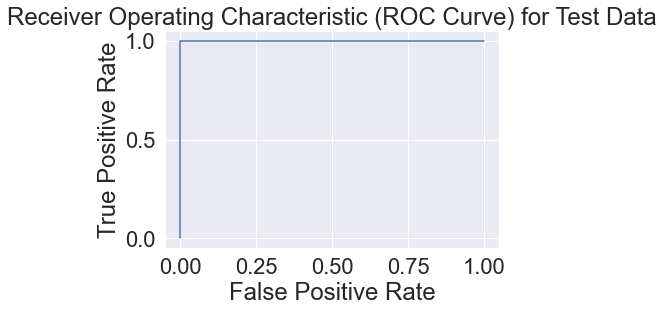

In [40]:
# Predict training X
forestClassifierPredictTrain = randomForestClassifier.predict(trainingXAPS)

# Calculate and print confusion matrix 
confusionMatrix = confusion_matrix(booleanTrainingY, forestClassifierPredictTrain)
print('Confusion Matrix for the test data: ')
print(confusionMatrix)
print('\n')

# Calculate and print the msiclassification rate
trueNegative, falsePositive, falseNegative, truePositive = confusionMatrix.ravel()
print('Test True Negative: ', trueNegative)
print('Test False Positive: ', falsePositive)
print('Test False Negative: ', falseNegative)
print('Test True Positive: ', truePositive, '\n')
errorRate = ((falsePositive + falseNegative)/(falsePositive + falseNegative + trueNegative + truePositive))
print('Test Data Misclassifiaction Rate: ', errorRate, '\n')

# Calculate and print the AUC for the training data
aucScore = roc_auc_score(booleanTrainingY, forestClassifierPredictTrain, average=None)
print('AUC For Test Data: ', aucScore, '\n')

# Calculate and plot ROC for the training data
trainingYProb = randomForestClassifier.predict_proba(trainingXAPS)[0:,1]
falsePositiveRate, truePositiveRate, thresholds = roc_curve(booleanTrainingY, trainingYProb)
plt.figure()
plt.plot(falsePositiveRate, truePositiveRate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve) for Test Data')
plt.show()

In [41]:
# Calculate the bag of error
outOfBagError =  randomForestClassifier.oob_score_
print('Out of Bag Error Estimate: ', outOfBagError)

# Calculate the test MSE
meanSquaredError = mean_squared_error(booleanTestingY, forestClassifierPredictTest)
print(f'Test Mean Squared Error: {meanSquaredError}')

Out of Bag Error Estimate:  0.9939666666666667
Test Mean Squared Error: 0.0079375


    (d) Research how class imbalance is addressed in random forests. Compensate for class imbalance in your random forest and repeat 2c. Compare the results with those of 2c.

In [42]:
# Train a random forest using class_weight='balanced' so that the classes are weighted inveresly proportional to how frequently they appear ot compensate for class imbalance
randomForestClassifier = RandomForestClassifier(oob_score=True, random_state=0, class_weight='balanced')
randomForestClassifier.fit(trainingXAPS, booleanTrainingY)

C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


RandomForestClassifier(class_weight='balanced', oob_score=True, random_state=0)

Confusion Matrix for the test data: 
[[15616     9]
 [  169   206]]


Test True Negative:  15616
Test False Positive:  9
Test False Negative:  169
Test True Positive:  206 

Test Data Misclassifiaction Rate:  0.011125 

AUC For Test Data:  0.7743786666666665 



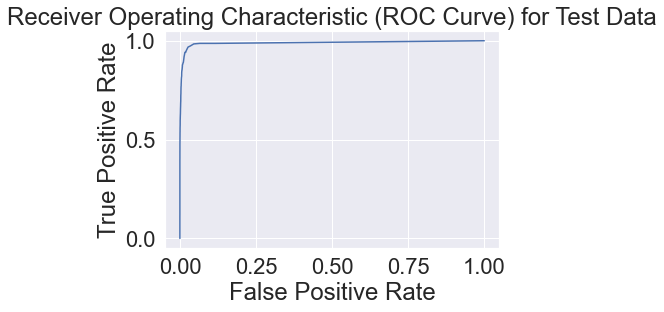

In [43]:
# Predict testing X
forestClassifierPredictTest = randomForestClassifier.predict(testingXAPS)

# Calculate and print confusion matrix 
confusionMatrix = confusion_matrix(booleanTestingY, forestClassifierPredictTest)
print('Confusion Matrix for the test data: ')
print(confusionMatrix)
print('\n')

# Calculate and print the msiclassification rate
trueNegative, falsePositive, falseNegative, truePositive = confusionMatrix.ravel()
print('Test True Negative: ', trueNegative)
print('Test False Positive: ', falsePositive)
print('Test False Negative: ', falseNegative)
print('Test True Positive: ', truePositive, '\n')
errorRate = ((falsePositive + falseNegative)/(falsePositive + falseNegative + trueNegative + truePositive))
print('Test Data Misclassifiaction Rate: ', errorRate, '\n')

# Calculate and print the AUC for the testing data
aucScore = roc_auc_score(booleanTestingY, forestClassifierPredictTest, average=None)
print('AUC For Test Data: ', aucScore, '\n')

# Calculate and plot ROC for the testing data
testingYProb = randomForestClassifier.predict_proba(testingXAPS)[0:,1]
falsePositiveRate, truePositiveRate, thresholds = roc_curve(booleanTestingY, testingYProb)
plt.figure()
plt.plot(falsePositiveRate, truePositiveRate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve) for Test Data')
plt.show()

Confusion Matrix for the test data: 
[[59000     0]
 [    0  1000]]


Test True Negative:  59000
Test False Positive:  0
Test False Negative:  0
Test True Positive:  1000 

Test Data Misclassifiaction Rate:  0.0 

AUC For Test Data:  1.0 



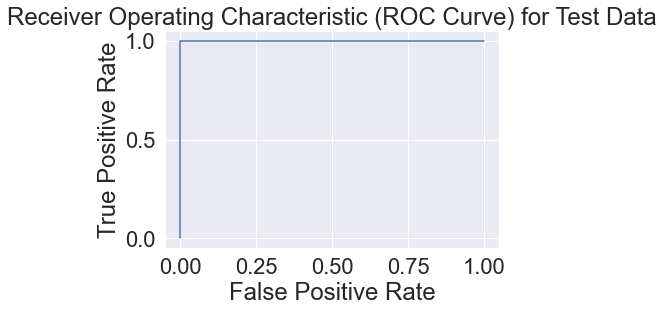

In [44]:
# Predict training X
forestClassifierPredictTrain = randomForestClassifier.predict(trainingXAPS)

# Calculate and print confusion matrix 
confusionMatrix = confusion_matrix(booleanTrainingY, forestClassifierPredictTrain)
print('Confusion Matrix for the test data: ')
print(confusionMatrix)
print('\n')

# Calculate and print the msiclassification rate
trueNegative, falsePositive, falseNegative, truePositive = confusionMatrix.ravel()
print('Test True Negative: ', trueNegative)
print('Test False Positive: ', falsePositive)
print('Test False Negative: ', falseNegative)
print('Test True Positive: ', truePositive, '\n')
errorRate = ((falsePositive + falseNegative)/(falsePositive + falseNegative + trueNegative + truePositive))
print('Test Data Misclassifiaction Rate: ', errorRate, '\n')

# Calculate and print the AUC for the training data
aucScore = roc_auc_score(booleanTrainingY, forestClassifierPredictTrain, average=None)
print('AUC For Test Data: ', aucScore, '\n')

# Calculate and plot ROC for the training data
trainingYProb = randomForestClassifier.predict_proba(trainingXAPS)[0:,1]
falsePositiveRate, truePositiveRate, thresholds = roc_curve(booleanTrainingY, trainingYProb)
plt.figure()
plt.plot(falsePositiveRate, truePositiveRate)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve) for Test Data')
plt.show()

In [45]:
# Calculate the bag of error
outOfBagError =  randomForestClassifier.oob_score_
print('Out of Bag Error Estimate: ', outOfBagError)

# Calculate the test MSE
meanSquaredError = mean_squared_error(booleanTestingY, forestClassifierPredictTest)
print(f'Test Mean Squared Error: {meanSquaredError}')

Out of Bag Error Estimate:  0.9921833333333333
Test Mean Squared Error: 0.011125


    (e) Model Trees: In the case of a univariate tree, only one input dimension is used at a tree split. In a multivariate tree, or model tree, at a decision node all input dimensions can be used and thus it is more general. In univariate classification trees, majority polling is used at each node to determine the split of that node as the decision rule. In model trees, a (linear) model that relies on all of the variables is used to determine the split of that node (i.e. instead of using Xj > s as the decision rule, one has SUM(βjXj > s. as the decision rule). Alternatively, in a regression tree, instead of using average in the region associated with each node, a linear regression model is used to determine the value associated with that node.
    
    One of the methods that can be used at each node is Logistic Regression. One can use scikit learn to call Weka7 to train Logistic Model Trees for classification. Train Logistic Model Trees for the APS data set without compensation for class imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods to estimate the error of your trained model and compare it with the test error. Report the Confusion Matrix, ROC, and AUC for training and test sets.



In [46]:
jvm.start(packages=True)
pkg.install_package("SMOTE")

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\mhano\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\mhano\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\mhano\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\mhano\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\mhano\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python38\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm

True

In [47]:
# Store data again in folder so it is cleanly uploaded again
imputedTrainingData.to_csv('../data/trainingData.csv', index=False)
imputedTestingData.to_csv('../data/testingData.csv', index=False)

# Upload data into the training and test sets
trainingSet = converters.load_any_file('../data/trainingData.csv', class_index="first")
testingSet = converters.load_any_file('../data/testingData.csv', class_index="first")

In [48]:
# Define the Logistic Model Tree and cross validate it with 5-fold 
cls = Classifier(classname="weka.classifiers.trees.LMT")
trainingSetEvaluation = Evaluation(trainingSet)
trainingSetEvaluation.crossvalidate_model(cls, trainingSet, 5, Random(42))

Confusion Matrix for Training Set:
[[58815.   185.]
 [  315.   685.]]
ROC Curve for Training Set: 


C:\Users\mhano\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\weka\plot\classifiers.py:225: MatplotlibDeprecationWarning: 
The set_window_title function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use manager.set_window_title or GUI-specific methods instead.
  fig.canvas.set_window_title(title)


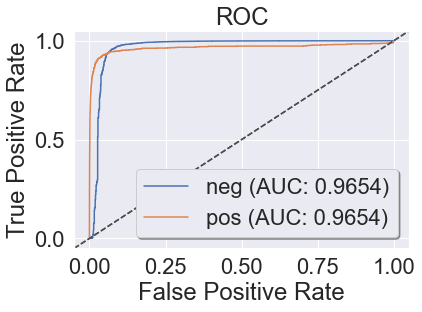

Model Summary for Training Set: 

Correctly Classified Instances       59500               99.1667 %
Incorrectly Classified Instances       500                0.8333 %
Kappa statistic                          0.7284
Mean absolute error                      0.0111
Root mean squared error                  0.0821
Relative absolute error                 33.9057 %
Root relative squared error             64.1157 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.315    0.995      0.997    0.996      0.730    0.965     0.998     neg
                 0.685    0.003    0.787      0.685    0.733      0.730    0.965     0.768     pos
Weighted Avg.    0.992    0.310    0.991      0.992    0.991      0.730    0.965     0.994     



In [49]:
# Get the confusion matrix for the training set
print('Confusion Matrix for Training Set:')
print(trainingSetEvaluation.confusion_matrix)

# Get the ROC curve for the training set
print('ROC Curve for Training Set: ')
plot_cls.plot_roc(trainingSetEvaluation, class_index=[0, 1], wait=True)

# Get the model summary for the training set
print('Model Summary for Training Set: ')
print(trainingSetEvaluation.summary())
print(trainingSetEvaluation.class_details())

Model Summary for testing Set: 

Correctly Classified Instances       15846               99.0375 %
Incorrectly Classified Instances       154                0.9625 %
Kappa statistic                          0.7713
Mean absolute error                      0.013 
Root mean squared error                  0.0887
Relative absolute error                 33.0671 %
Root relative squared error             58.5516 %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.288    0.993      0.997    0.995      0.775    0.974     0.998     neg
                 0.712    0.003    0.853      0.712    0.776      0.775    0.974     0.803     pos
Weighted Avg.    0.990    0.281    0.990      0.990    0.990      0.775    0.974     0.993     

ROC Curve for testing Set: 


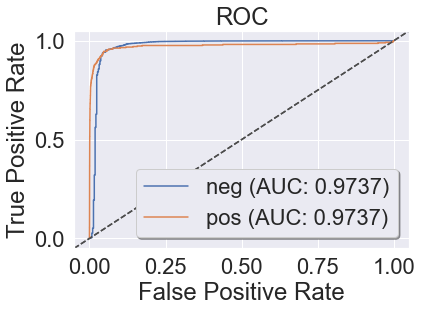

Model Summary for testing Set: 

Correctly Classified Instances       15846               99.0375 %
Incorrectly Classified Instances       154                0.9625 %
Kappa statistic                          0.7713
Mean absolute error                      0.013 
Root mean squared error                  0.0887
Relative absolute error                 33.0671 %
Root relative squared error             58.5516 %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.288    0.993      0.997    0.995      0.775    0.974     0.998     neg
                 0.712    0.003    0.853      0.712    0.776      0.775    0.974     0.803     pos
Weighted Avg.    0.990    0.281    0.990      0.990    0.990      0.775    0.974     0.993     



In [50]:
# Build the classifier with the training set and test it with the testing set
cls.build_classifier(trainingSet) 
trainingSetEvaluation = Evaluation(trainingSet)
testingSetEvaluation = trainingSetEvaluation.test_model(cls, testingSet)

# Get the summary for the training set
#print(testingSetEvaluation)
print('Model Summary for testing Set: ')
print(trainingSetEvaluation.summary())
print(trainingSetEvaluation.class_details())

# Get the ROC curve for the training set
print('ROC Curve for testing Set: ')
plot_cls.plot_roc(trainingSetEvaluation, class_index=[0, 1], wait=True)

# Get the model summary for the training set
print('Model Summary for testing Set: ')
print(trainingSetEvaluation.summary())
print(trainingSetEvaluation.class_details())

    (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance.8 Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.

In [51]:
# Create the SMOTE object and the Logistic Model Tree Classifier
smoteFilter = Filter(classname="weka.filters.supervised.instance.SMOTE")
smoteClassifier = Classifier(classname="weka.classifiers.trees.LMT")

# Define the filtered classifier with the smote filter
filteredClassifier = FilteredClassifier()
filteredClassifier.Classifier = smoteClassifier
filteredClassifier.Filter = smoteFilter

# Train the model with the training set and cross validate it with 5-fold
trainingSetEvaluation = Evaluation(trainingSet)
trainingSetEvaluation.crossvalidate_model(filteredClassifier, trainingSet, 5, Random(1))

Confusion Matrix for Training Set:
[[58827.   173.]
 [  383.   617.]]
Model Summary for Training Set: 

Correctly Classified Instances       59444               99.0733 %
Incorrectly Classified Instances       556                0.9267 %
Kappa statistic                          0.6847
Mean absolute error                      0.0129
Root mean squared error                  0.0913
Relative absolute error                 39.3526 %
Root relative squared error             71.2814 %
Total Number of Instances            60000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.383    0.994      0.997    0.995      0.690    0.914     0.996     neg
                 0.617    0.003    0.781      0.617    0.689      0.690    0.914     0.616     pos
Weighted Avg.    0.991    0.377    0.990      0.991    0.990      0.690    0.914     0.990     

ROC Curve for Training Set: 


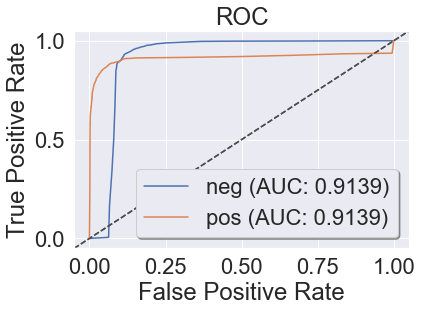

In [52]:
# Get the confusion matrix for the training set
print('Confusion Matrix for Training Set:')
print(trainingSetEvaluation.confusion_matrix)

# Get the summary for the model for the training set
print('Model Summary for Training Set: ')
print(trainingSetEvaluation.summary())
print(trainingSetEvaluation.class_details())

# Get the ROC curve for the training set
print('ROC Curve for Training Set: ')
plot_cls.plot_roc(trainingSetEvaluation, class_index=[0, 1], wait=True)

Confusion Matrix for Testing Set:
[[15578.    47.]
 [  158.   217.]]
Model Summary for Testing Set: 

Correctly Classified Instances       15795               98.7188 %
Incorrectly Classified Instances       205                1.2813 %
Kappa statistic                          0.6729
Mean absolute error                      0.0178
Root mean squared error                  0.1087
Relative absolute error                 45.296  %
Root relative squared error             71.7936 %
Total Number of Instances            16000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.421    0.990      0.997    0.993      0.684    0.894     0.995     neg
                 0.579    0.003    0.822      0.579    0.679      0.684    0.894     0.625     pos
Weighted Avg.    0.987    0.412    0.986      0.987    0.986      0.684    0.894     0.987     

ROC Curve for Testing Set: 


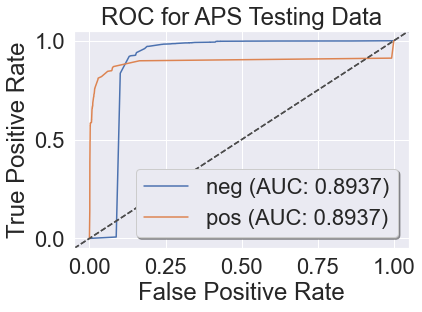

In [53]:
# Train the classifier with the training set and evaluate the test set
filteredClassifier.build_classifier(trainingSet)
smoteEvaluation = Evaluation(trainingSet)
testingSetEvaluation = smoteEvaluation.test_model(filteredClassifier, testingSet)


# Get the confusion matrix for the training set
#print(testingSetEvaluation)
print('Confusion Matrix for Testing Set:')
print(smoteEvaluation.confusion_matrix)

# Get the ROC curve for the training set
print('Model Summary for Testing Set: ')
print(smoteEvaluation.summary())
print(smoteEvaluation.class_details())

# Get the summary for the model for the training set
print('ROC Curve for Testing Set: ')
plot_cls.plot_roc(smoteEvaluation, class_index=[0, 1], wait=True, title="ROC for APS Testing Data")

In [54]:
jvm.stop()

3. ISLR 6.6.3 Suppose we estimate the regression coefficients in a linear regression model by minimizing 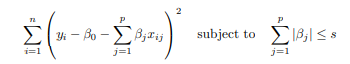 for a particular value of s. For parts (a) through (e), indicate which of i. through v. is correct. Justify your answer.


    a) As we increase s from 0, the training RSS will: Steadily decrese. As we increase s from 0, we are restricting the βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes a steady decrease in the training RSS.

    b) Repeat (a) for test RSS: Decrease initially, and then eventually start increasing in a U shape. As we increase s form 0, we are restricting βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes a first decrease in the test RSS before increasing again after that in a typical U shape.
    
    c) Repeat (a) for variance: Steadily increase. As we increase s from 0, we are restricting βj coefficients less and less (the coefficients will increase to their least squares estimates), and so the model is becoming more and more flexible which provokes a steady increase in variance. 
    
    d) Repeat (a) for (squared) bias: Steadily decrease. As we increase s from 0, we are restricting the βj coefficients less and less (the coefficients will icnrease to their least squares estimates), and so the model is becoming more and more flexible which provokes a steady decrease in bias. 
    
    e) Repeat (a) for the irreducilbe error: Remain constant. By definition, the irreducible erorr is independent of the model, and consequently independent of the value of s.

4. ISLR, 6.6.5 It is well-known that ridge regression tends to give similar coefficient values to correlated variables, whereas the lasso may give quite different coefficient values to correlated variables. We will now explore this property in a very simple setting. Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore, suppose that y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0, so that the estimate for the intercept in a least squares, ridge regression, or lasso model is zero: βˆ0 = 0.

    (a) Write out the ridge regression optimization problem in this setting

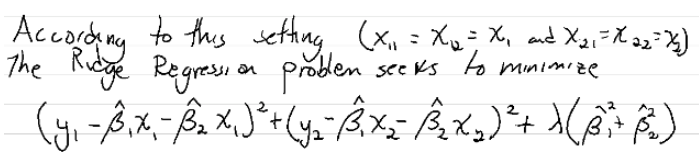

    (b) Argue that in this setting, the ridge coefficient estimates satisfy βˆ1 = βˆ2.
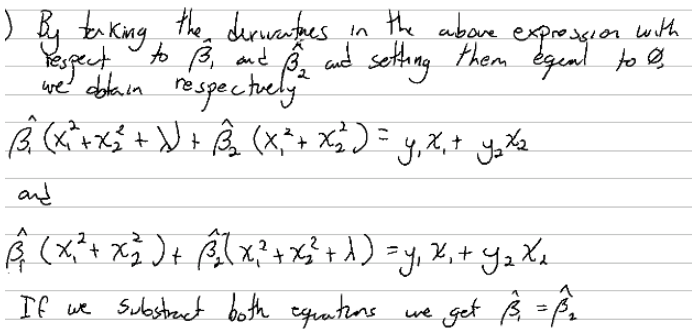
    
    (c) Write out the lasso optimization problem in this setting.
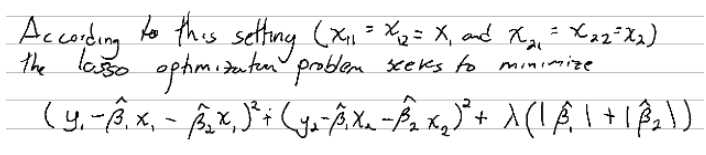

    (d) Argue that in this setting, the lasso coefficients βˆ1 and βˆ2 are not unique—in other words, there are many possible solutions to the optimization problem in (c). Describe these solutions.
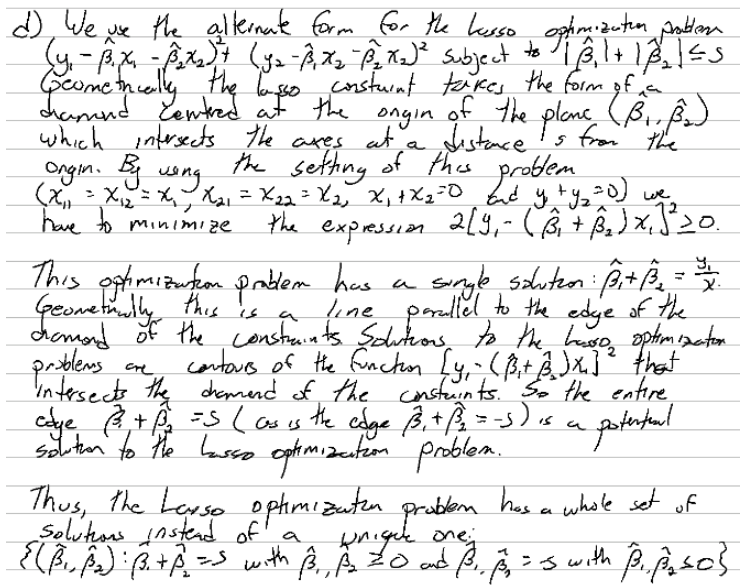

5. ISLR 8.4.5 Suppose we produce ten bootstrapped samples from a data set containing red and green classes. We then apply a classification tree to each bootstrapped sample and, for a specific value of X, produce 10 estimates of P(Class is Red|X): 0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75. There are two common ways to combine these results together into a single class prediction. One is the majority vote approach discussed in this chapter. The second approach is to classify based on the average probability. In this example, what is the final classification under each of these two approaches?
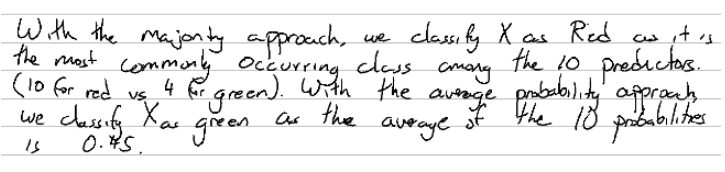

6. ISLR 9.7.3 Here we explore the maximal margin classifier on a toy data set.

    (a) We are given n = 7 observations in p = 2 dimensions. For each observation, there is an associated class label. Sketch the observations.
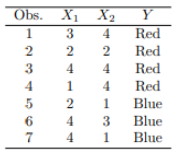

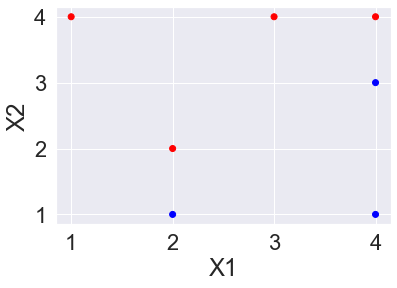

In [75]:
x1 = [3, 2, 4, 1, 2, 4, 4]
x2 = [4, 2, 4, 4, 1, 3, 1]
Y = ['Red', 'Red', 'Red', 'Red', 'Blue', 'Blue', 'Blue']
plt.scatter(x1, x2, c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

    (b) Sketch the optimal separating hyperplane, and provide the equation for this hyperplane (of the form (9.1)).
    
    The line must pass thorugh the points (2, 1.5) and (4, 3.5) because the optimal separating hyperplane must be between (2,1) and (2,2) as well as between (4, 3 adn 4, 4). Therefore, the equation for this line is X1-X2-0.5=0, or X1-X2=0.5

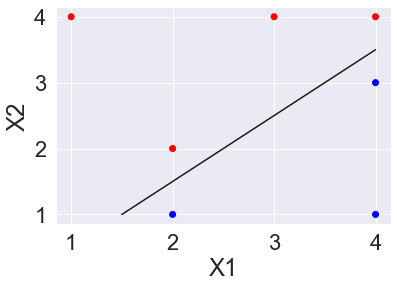

In [76]:
xValues = [1.5, 4]
yValues = [1, 3.5]
plt.scatter(x1, x2, c=Y)
plt.plot(xValues, yValues, 'k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

    (c) Describe the classification rule for the maximal margin classifier. It should be something along the lines of “Classify to Red if β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide the values for β0, β1, and β2.
    
    Classification Rule: if X1-X2=0.5<0, classify to red. Otherwise, if X1-X2-0.5>0, classify to blue.

    (d) On your sketch, indicate the margin for the maximal margin hyperplane.

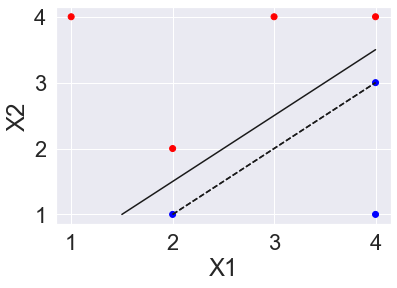

In [77]:
xValues = [1.5, 4]
yValues = [1, 3.5]
plt.scatter(x1, x2, c=Y)
plt.plot(xValues, yValues, 'k')
xValues = [2, 4]
yValues = [1, 3]
plt.plot(xValues, yValues, 'k--')
x_vals = [1, 4]
y_vals = [1, 4]
plt.plot(xValues, yValues, 'k--')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

    (e) Indicate the support vectors for the maximal margin classifier.
    
    The following points are the support vecotrs for the maximal margin classifier: (2,1), (2,2), (4,3), (4,4).

    (f) Argue that a slight movement of the seventh observation would not affect the maximal margin hyperplane.
    
    Because the 7th observation, which is (4,1), is not a support vector, moving it would not change the maximal hyperplane.

    (g) Sketch a hyperplane that is not the optimal separating hyperplane, and provide the equation for this hyperplane.
    
    A hyperplane that is not the optimal separating hyperplane could be when the line passes through the points (2,1.3) and (4,3.3), where the equation is X1-X2-0.7=0, or X1-X2=0.7 

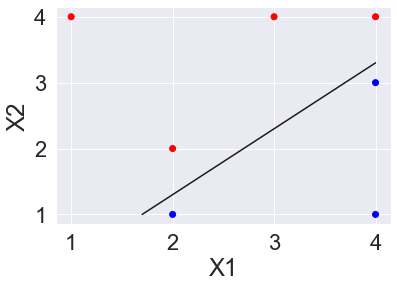

In [78]:
xValues = [1.7, 4]
yValues = [1, 3.3]
plt.scatter(x1, x2, c=Y)
plt.plot(xValues, yValues, 'k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

    (h) Draw an additional observation on the plot so that two classes are no longer separable by a hyperplane.
    
    The addition of the red observation (3.5,1.5) will lead to the two classes no longer being separable by a hyperplane. 

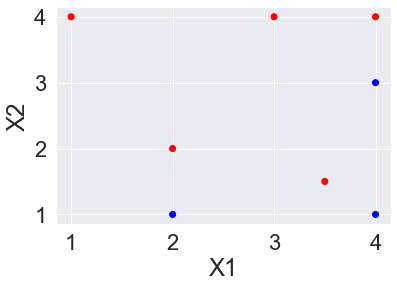

In [79]:
x1 = [3, 2, 4, 1, 2, 4, 4, 3.5]
x2 = [4, 2, 4, 4, 1, 3, 1, 1.5]
Y = ["red", "red", "red", "red", "blue", "blue", "blue", "red"]
plt.scatter(x1, x2, c=Y)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()